# A Disney Comparison: Lilo & Stitch vs. Moana

Lilo & Stitch is my favorite Disney movie, so for my final project I decided to do sentiment analysis on the movie. In addition, I thought that it would be cool to also do sentiment analysis on the script of Moana since they are both movies that deal with Hawaiian/Polynesian culture.

My prediction for Lilo & Stitch is that the very beginning scene will have lower sentiment than the rest of the movie because they are talking about Stich as a monster and sending Jumba to exile on a desert asteroid. In addition, my guess would be that Moana would have higher sentiment than Lilo & Stitch because Lilo & Stitch involves aliens and Moana is mostly about Moana's adventure on the sea.

In [1]:
from datascience import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 2.5)
!pip install --no-cache-dir textblob
from textblob import TextBlob
!pip install --no-cache-dir wordcloud
from wordcloud import WordCloud

## Lilo & Stitch: The Data
The script of the 2002 Disney animated film *Lilo & Stitch* was taken from 
[this website](//http://www.script-o-rama.com/movie_scripts/l/lilo-and-stitch-script-transcript.html)

In order to look at the sentiment of the script as the movie progresses, I had to watch the movie and manually split the text into 5 minute blocks. The naming system that I used for the time blocks works as follows. The block named '5' includes the five minutes up until that point. So time 5 is the first 5 minutes of the movie, and time 25 is the time from 20-25 minutes. Thus, `l5` is the text for the first 5 minutes of the movie, and `l25` is the text for time 20-25 minutes.

In [2]:
# loading the full text file
with open('lilostitch.txt', 'r') as f:
    lilo_full_text = f.read()

In [3]:
# removing the punctuation from the raw text file
from string import punctuation
lilo = ''.join([word for word in lilo_full_text if word not in punctuation])
lilo = lilo.lower()

In [4]:
# manually splitting the text into 5 minute blocks using the text file without punctuation 
l5 = '\n                   \n\nread the charges\n\n\n\n \n\n                   \n\ndr jumba jookiba\n\n\n\n \n\n                   \n\nlead scientist of\n\ngalaxy defense industries\n\n\n\n \n\n                   \n\nyou stand before this council\n\n\n\n \n\n                   \n\naccused of illegal\n\ngenetic experimentation\n\n\n\n \n\n                   \n\nhow do you plead\n\n\n\n \n\n                   \n\nnot guilty\n\n\n\n \n\n                   \n\nmy experiments\n\nare only theoretical\n\n\n\n \n\n                   \n\ncompletely\n\nwithin legal boundaries\n\n\n\n  \n\n                   \n\nwe believe you actually\n\ncreated something\n\n\n\n  \n\n                   \n\ncreated something ha\n\n\n\n  \n\n                   \n\nbut that would be irresponsible\n\nand unethical\n\n\n\n  \n\n                   \n\ni would never ever\n\n\n\n  \n\n                   \n\nmake more than one\n\n\n\n  \n\n                   \n\nwhat is that monstrosity\n\n\n\n  \n\n                   \n\nmonstrosity\n\n\n\n  \n\n                   \n\nwhat you see before you\n\nis the first of a new species\n\n\n\n  \n\n                   \n\ni call it experiment    \n\n\n\n  \n\n                   \n\nhe is bulletproof fireproof\n\n\n\n  \n\n                   \n\nand can think faster\n\nthan supercomputer\n\n\n\n  \n\n                   \n\nhe can see in the dark\n\n\n\n  \n\n                   \n\nand move objects\n\n     times his size\n\n\n\n  \n\n                   \n\nhis only instinct\n\n\n\n  \n\n                   \n\nto destroy\n\neverything he touches\n\n\n\n  \n\n                   \n\nso it is a monster\n\n\n\n  \n\n                   \n\nhey just a little one\n\n\n\n  \n\n                   \n\nit is an affront to nature\n\n\n\n  \n\n                   \n\nit must be destroyed\n\n\n\n  \n\n                   \n\ncalm yourself captain gantu\n\n\n\n  \n\n                   \n\nperhaps it can be reasoned with\n\n\n\n  \n\n                   \n\nexperiment    \n\n\n\n  \n\n                   \n\ngive us some sign you understand\n\nany of this\n\n\n\n  \n\n                   \n\nshow us that there is something\n\ninside you that is good\n\n\n\n  \n\n                   \n\nhmm\n\n\n\n  \n\n                   \n\nmeega nala kweesta\n\n\n\n  \n\n                   \n\nso naughty\n\n\n\n  \n\n                   \n\ni didnt teach it that\n\n\n\n  \n\n                   \n\nplace that idiot scientist\n\nunder arrest\n\n\n\n  \n\n                   \n\ni prefer to be called\n\nevil genius\n\n\n\n  \n\n                   \n\nand as for that abomination\n\n\n\n  \n\n                   \n\nit is the flawed product\n\nof a deranged mind\n\n\n\n  \n\n                   \n\nit has no place among us\n\n\n\n  \n\n                   \n\ncaptain gantu take him away\n\n\n\n  \n\n                   \n\nwith pleasure\n\n\n\n  \n\n                   \n\nhmm\n\n\n\n  \n\n                   \n\nuncomfortable\n\n\n\n  \n\n                   \n\noh\n\n\n\n  \n\n                   \n\ngood\n\n\n\n  \n\n                   \n\nthe council has banished you\n\nto exile on a desert asteroid\n\n\n\n  \n\n                   \n\nso relax enjoy the trip\n\n\n\n  \n\n                   \n\nand dont get any ideas\n\n\n\n  \n\n                   \n\nthese guns are locked\n\nonto your genetic signature\n\n\n\n  \n\n                   \n\nthey wont shoot anyone but you\n\n\n\n  \n\n                   \n\now why you\n\n\n\n  \n\n                   \n\nmay i remind the captain\n\nthat he is on duty\n\n\n\n  \n\n                   \n\nsecure the cell\n\n\n\n  \n\n                   \n\naye captain\n\n\n\n  \n\n                   \n\ncaptain on deck\n\n\n\n  \n\n                   \n\nall ahead full\n\n\n\n  \n\n                   \n\ndo does this uh\n\nlook infected to you\n\n\n\n  \n\n                   \n\noh\n\n\n\n  \n\n                   \n\nquiet you\n\n\n\n  \n\n                   \n\ngunfire in the cell bay\n\n\n\n  \n\n                   \n\nopen a channel\n\n\n\n  \n\n                   \n\nhes loose on deck c\n\n\n\n  \n\n                   \n\nred alert\n\nseal off the deck'

In [5]:
l10 = 'security\n\nconverge on door seven\n\n\n\n  \n\n                   \n\ndeadly force authorized\n\n\n\n  \n\n                   \n\nfire on sight\n\n\n\n  \n\n                   \n\nthere he is\n\n\n\n  \n\n                   \n\nsecurity to bridge\n\n\n\n  \n\n                   \n\nits in the ventilation system\n\n\n\n  \n\n                   \n\nhes headed for the power\n\n\n\n  \n\n                   \n\ngrid\n\n\n\n  \n\n                   \n\nwhat was that\n\n\n\n  \n\n                   \n\ni dont think hes\n\non the ship anymore\n\n\n\n  \n\n                   \n\nconfirmed\n\nhes taken a police cruiser\n\n\n\n  \n\n                   \n\nyeah he took the red one\n\n\n\n  \n\n                   \n\nyeehaw\n\n\n\n  \n\n                   \n\nhmm\n\n\n\n  \n\n                   \n\nthats it\n\n\n\n  \n\n                   \n\nwe got it\n\nwe got it\n\n\n\n  \n\n                   \n\nhyperdrive activated\n\n\n\n  \n\n                   \n\nsystem charging\n\n\n\n  \n\n                   \n\nhes engaged his hdrive\n\n\n\n  \n\n                   \n\nwarning\n\nguidance is not functional\n\n\n\n  \n\n                   \n\npursuit commander\n\n\n\n  \n\n                   \n\nthat crazy trog is\n\nabout to make a jump\n\n\n\n  \n\n                   \n\nbreak formation\n\nget clear of that ship\n\n\n\n  \n\n                   \n\nnavigation failure\n\n\n\n  \n\n                   \n\ndo not engage hyper\n\n\n\n  \n\n                   \n\nget me galactic control\n\n\n\n  \n\n                   \n\nwhere is he\n\n\n\n  \n\n                   \n\nhes still in hyperspace\n\n\n\n  \n\n                   \n\nwhere will he exit\n\n\n\n  \n\n                   \n\ncalculating now\n\n\n\n  \n\n                   \n\nquadrant    section    \n\narea   \n\n\n\n  \n\n                   \n\na planet called eearth\n\n\n\n  \n\n                   \n\ni want an expert on this planet\n\nin here now\n\n\n\n   \n\n                   \n\nwhat is that\n\n\n\n   \n\n                   \n\nwater most of the planet\n\nis covered in it\n\n\n\n   \n\n                   \n\nhe wont survive in water\n\n\n\n   \n\n                   \n\nhis molecular density\n\nis too great\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nof course\n\n\n\n   \n\n                   \n\nhow much time do we have\n\n\n\n   \n\n                   \n\nwe have projected his landing\n\nat three hours    minutes\n\n\n\n   \n\n                   \n\noh we have to gas the planet\n\n\n\n   \n\n                   \n\nhold it\n\n\n\n   \n\n                   \n\nhold everything\n\n\n\n   \n\n                   \n\nearth is a protected\n\nwildlife preserve\n\n\n\n   \n\n                   \n\nyeah weve been using it\n\n\n\n   \n\n                   \n\nto rebuild\n\nthe mosquito population\n\n\n\n   \n\n                   \n\nwhich need i remind you\n\nis an endangered species\n\n\n\n   \n\n                   \n\nam i to assume\n\nyou are the expert\n\n\n\n   \n\n                   \n\noh i dont know about expert\n\n\n\n   \n\n                   \n\nagent pleakley at your service\n\n\n\n   \n\n                   \n\ncan we not simply\n\ndestroy the island\n\n\n\n   \n\n                   \n\nno crazyhead\n\n\n\n   \n\n                   \n\nthe mosquitos food of choice\n\nprimitive humanoid life forms\n\n\n\n   \n\n                   \n\nhave colonies\n\nall over that planet\n\n\n\n   \n\n                   \n\nare they intelligent\n\n\n\n   \n\n                   \n\nno but theyre very delicate\n\n\n\n   \n\n                   \n\nin fact every time an asteroid\n\nstrikes their planet\n\n\n\n   \n\n                   \n\nthey have to begin life\n\nall over\n\n\n\n   \n\n                   \n\nits fascinating isnt it\n\n\n\n   \n\n                   \n\nwith this\n\nive been able to study\n\n\n\n   \n\n                   \n\nwhat if our military forces\n\njust landed there\n\n\n\n   \n\n                   \n\nwell thatd be a bad idea\n\n\n\n   \n\n                   \n\nthese are extremely\n\nsimple creatures miss\n\n\n\n   \n\n                   \n\nlanding there would create mass\n\nmayhem and planetwide panic\n\n\n\n   \n\n                   \n\na quiet capture would require\n\nan understanding of    \n\n\n\n   \n\n                   \n\nthat we do not possess\n\n\n\n   \n\n                   \n\nwho then mr pleakley would\n\nyou send for his extraction\n\n\n\n   \n\n                   \n\ndoes he have a brother\n\n\n\n   \n\n                   \n\nclose grandmother perhaps\n\n\n\n   \n\n                   \n\nfriendly cousin\n\n\n\n   \n\n                   \n\nneighbor with a beard\n\n\n\n   \n\n                   \n\nhe got away\n\n\n\n   \n\n                   \n\nim sure this comes\n\nas no surprise to you\n\n\n\n   \n\n                   \n\ni designed this creature\n\nfor to be unstoppable\n\n\n\n   \n\n                   \n\nwhich is precisely why you\n\nmust now bring him back\n\n\n\n   \n\n                   \n\nwhat me\n\n\n\n   \n\n                   \n\nand to reward you\n\n\n\n   \n\n                   \n\nwe are willing to trade\n\nyour freedom for his capture\n\n\n\n   \n\n                   \n\n    will not come easily\n\n\n\n   \n\n                   \n\nmaybe direct hit\n\nfrom plasma cannon\n\n\n\n   \n\n                   \n\nmight stun him long enough to\n\n\n\n   \n\n                   \n\nplasma cannon granted\n\n\n\n   \n\n                   \n\ndo we have a bargain dr jumba\n\n\n\n   \n\n                   \n\nbbbut its a delicate planet\n\n\n\n   \n\n                   \n\nwhos going to control him\n\n\n\n   \n\n                   \n\nyou will\n\n\n\n   \n\n                   \n\nvery good your highness\n\n\n\n   \n\n                   \n\ni i didnt quite\n\n\n\n   \n\n                   \n\nuh youre notjoking\n\n\n\n   \n\n                   \n\nso tell me\n\nmy little oneeyed one\n\n\n\n   \n\n                   \n\non what poor pitiful\n\ndefenseless planet\n\n\n\n   \n\n                   \n\nhas my monstrosity\n\nbeen unleashed\n\n\n\n   \n\n                   \n\nmahalo nui ia'

In [6]:
l15 = 'ke ali iwahine\n\n\n\n   \n\n                   \n\no lili ulani\n\n\n\n   \n\n                   \n\no ka wohi ku\n\n\n\n   \n\n                   \n\nka pipio mai o ke anuenue\n\n\n\n   \n\n                   \n\nna waihooluu a halikeole\n\n\n\n   \n\n                   \n\ne nana na maka\n\ni ke ao malama\n\n\n\n   \n\n                   \n\nmai hawaii akea i kauai\n\n\n\n   \n\n                   \n\no kalkaua he inoa\n\n\n\n   \n\n                   \n\no ka pua mae ole i ka i\n\n\n\n   \n\n                   \n\nka pua maila i ka mauna\n\n\n\n   \n\n                   \n\ni ke kuahiwi o mauna kea\n\n\n\n   \n\n                   \n\nke maila i klauea\n\n\n\n   \n\n                   \n\nmlamalama i wahinekapu\n\n\n\n   \n\n                   \n\na ka luna o uwkahuna\n\n\n\n   \n\n                   \n\ni ka pali kapu o ka auea\n\n\n\n   \n\n                   \n\nea mai ke ali i kia manu\n\n\n\n   \n\n                   \n\nua wehi i ka hulu o ka mamo\n\n\n\n   \n\n                   \n\nka pua nani a o hawai i\n\n\n\n   \n\n                   \n\no kalkaua he inoa\n\n\n\n   \n\n                   \n\no kalkaua he inoa\n\n\n\n   \n\n                   \n\nka pua mae ole i ka i\n\n\n\n   \n\n                   \n\nka pua maila i ka mauna\n\n\n\n   \n\n                   \n\ni ke kuahiwi o mauna kea\n\n\n\n   \n\n                   \n\nke maila i klauea\n\n\n\n   \n\n                   \n\none two three four\n\n\n\n   \n\n                   \n\nmlamalama i\n\nwahinekapu\n\n\n\n   \n\n                   \n\nayyiyi\n\n\n\n   \n\n                   \n\na ka luna o uwkahuna\n\n\n\n   \n\n                   \n\ni ka pali kapu o ka auea\n\n\n\n   \n\n                   \n\nmahalo nui ia\n\n\n\n   \n\n                   \n\nke ali iwahine\n\n\n\n   \n\n                   \n\no lili ulani\n\n\n\n   \n\n                   \n\no ka wohi ku\n\n\n\n   \n\n                   \n\nea mai ke ali i kia manu\n\n\n\n   \n\n                   \n\nua wehi i ka hulu o ka mamo\n\n\n\n   \n\n                   \n\nka pua nani a o hawai i\n\n\n\n   \n\n                   \n\no kalkaua he inoa\n\n\n\n   \n\n                   \n\nhe inoa no kalani kalakaua\n\nkulele\n\n\n\n   \n\n                   \n\nwhoa\n\nwhoa\n\n\n\n   \n\n                   \n\nstop stop\n\n\n\n   \n\n                   \n\nlilo why are you all wet\n\n\n\n   \n\n                   \n\nits sandwich day\n\n\n\n   \n\n                   \n\nevery thursday\n\ni take pudge the fish\n\n\n\n   \n\n                   \n\na peanut butter sandwich\n\n\n\n   \n\n                   \n\npudge is a fish\n\n\n\n   \n\n                   \n\nand today we were out\n\nof peanut butter\n\n\n\n   \n\n                   \n\nso i asked my sister\n\nwhat to give him\n\n\n\n   \n\n                   \n\nand she said a tuna sandwich\n\n\n\n   \n\n                   \n\ni cant give pudge tuna\n\n\n\n   \n\n                   \n\ndo you know what tuna is\n\n\n\n   \n\n                   \n\nfish\n\n\n\n   \n\n                   \n\nits fish\n\n\n\n   \n\n                   \n\nif i gave pudge tuna\n\nid be an abomination\n\n\n\n   \n\n                   \n\nim late because\n\ni had to go to the store\n\n\n\n   \n\n                   \n\nand get peanut butter\n\n\n\n   \n\n                   \n\ncause all we have\n\nisis stinkin tuna\n\n\n\n   \n\n                   \n\nlilo lilo why is\n\nthis so important\n\n\n\n   \n\n                   \n\npudge controls the weather\n\n\n\n   \n\n                   \n\nyoure crazy\n\n\n\n   \n\n                   \n\nplease please\n\n\n\n   \n\n                   \n\neverybody calm down\n\n\n\n   \n\n                   \n\ngirls\n\n\n\n   \n\n                   \n\nshh\n\n\n\n   \n\n                   \n\nlilo\n\n\n\n   \n\n                   \n\nim sorry im sorry\n\n\n\n   \n\n                   \n\ni wont do it again\n\n\n\n   \n\n                   \n\nmaybe we should call\n\nyour sister\n\n\n\n   \n\n                   \n\nno ill be good\n\n\n\n   \n\n                   \n\ni want to dance\n\n\n\n   \n\n                   \n\ni practiced\n\n\n\n   \n\n                   \n\ni just want to dance\n\n\n\n   \n\n                   \n\ni practiced\n\n\n\n   \n\n                   \n\nooh she bit me\n\n\n\n   \n\n                   \n\neww\n\n\n\n   \n\n                   \n\ni called your sister\n\n\n\n   \n\n                   \n\nshe said to wait for her\n\nhere on the porch\n\n\n\n   \n\n                   \n\nwell try again on sunday\n\n\n\n   \n\n                   \n\ndoes this look infected\n\nto you\n\n\n\n   \n\n                   \n\nyeah\n\n\n\n   \n\n                   \n\nyou better not have rabies\n\n\n\n   \n\n                   \n\nif you have rabies\n\n\n\n   \n\n                   \n\nthe dogcatcher is\n\ngoing to have to cut\n\n\n\n   \n\n                   \n\nare you going to play dolls\n\n\n\n   \n\n                   \n\nyou dont have a doll\n\n\n\n   \n\n                   \n\nthis is scrump\n\n\n\n   \n\n                   \n\ni made her\n\nbut her head is too big\n\n\n\n   \n\n                   \n\nso i pretend a bug laid eggs\n\nin her ears and shes upset\n\n\n\n   \n\n                   \n\nbecause she only has\n\na few more days to\n\n\n\n   \n\n                   \n\nlilo\n\n\n\n   \n\n                   \n\nlilo'

In [7]:
l20 = 'lilo\n\n\n\n   \n\n                   \n\noh no\n\n\n\n   \n\n                   \n\nyou better be home\n\n\n\n   \n\n                   \n\nhey watch where youre going\n\n\n\n   \n\n                   \n\nstupidhead\n\n\n\n   \n\n                   \n\ni found a new place to dwell\n\n\n\n   \n\n                   \n\noh lilo\n\n\n\n   \n\n                   \n\nlilo open the door lilo\n\n\n\n   \n\n                   \n\ngo away\n\n\n\n   \n\n                   \n\nyou make me so lonely\n\nbaby\n\n\n\n   \n\n                   \n\nlilo\n\n\n\n   \n\n                   \n\nwe dont have time for this\n\n\n\n   \n\n                   \n\ni get so lonely\n\n\n\n   \n\n                   \n\nleave me alone to die\n\n\n\n   \n\n                   \n\ncome on lilo\n\n\n\n   \n\n                   \n\nthat social workers going\n\nto be here any minute\n\n\n\n   \n\n                   \n\nyou still can find\n\nsome room\n\n\n\n   \n\n                   \n\nfor brokenhearted lovers\n\nto cry away their gloom\n\n\n\n   \n\n                   \n\ndont make me so lonely baby\n\n\n\n   \n\n                   \n\ndont make me so lonely\n\n\n\n   \n\n                   \n\ni get so lonely i could die\n\n\n\n   \n\n                   \n\nthe bellhops tears\n\nkeep flowin\n\n\n\n   \n\n                   \n\nyou are so finished\n\nwhen i get in there\n\n\n\n   \n\n                   \n\nwell they been so long\n\non lonely street\n\n\n\n   \n\n                   \n\nthey aint ever\n\ngonna look back\n\n\n\n   \n\n                   \n\noh im going to stuff you\n\nin the blender\n\n\n\n   \n\n                   \n\npush puree\n\nthen bake you into a pie\n\n\n\n   \n\n                   \n\nand feed it\n\nto the social worker\n\n\n\n   \n\n                   \n\nand when he says\n\nmmm this is great\n\n\n\n   \n\n                   \n\nwhats your secret\n\nim going to say\n\n\n\n   \n\n                   \n\nlove and nurturing\n\n\n\n   \n\n                   \n\nhi uh\n\n\n\n   \n\n                   \n\nyou must be the uh\n\n\n\n   \n\n                   \n\nthe stupidhead\n\n\n\n   \n\n                   \n\noh oh\n\n\n\n   \n\n                   \n\noh you know\n\nim really sorry about that\n\n\n\n   \n\n                   \n\nand if id known who you were\n\nof course i never wouldve\n\n\n\n   \n\n                   \n\nuh i can pay for that\n\n\n\n   \n\n                   \n\nits a rental\n\n\n\n   \n\n                   \n\nare you the guardian\n\nin question\n\n\n\n   \n\n                   \n\nyes im nani\n\n\n\n   \n\n                   \n\nnice to meet you mister\n\n\n\n   \n\n                   \n\nbubbles\n\n\n\n   \n\n                   \n\nmr bubbles\n\n\n\n   \n\n                   \n\nthats a strange\n\n\n\n   \n\n                   \n\nyes i know\n\n\n\n   \n\n                   \n\nare you going\n\nto invite me in nani\n\n\n\n   \n\n                   \n\nuh i thought we could\n\nsit out here and talk\n\n\n\n   \n\n                   \n\ni dont think so\n\n\n\n   \n\n                   \n\nright uh\n\n\n\n   \n\n                   \n\nits always crowded\n\n\n\n   \n\n                   \n\nthis way\n\n\n\n   \n\n                   \n\nyou still can find some room\n\n\n\n   \n\n                   \n\nfor brokenhearted lovers\n\nto cry away their gloom\n\n\n\n   \n\n                   \n\nyou make me so lonely baby\n\n\n\n   \n\n                   \n\nuh wait here\n\n\n\n   \n\n                   \n\nhey\n\n\n\n   \n\n                   \n\nso\n\n\n\n   \n\n                   \n\nlemonade\n\n\n\n   \n\n                   \n\ndo you often\n\nleave your sister home alone\n\n\n\n   \n\n                   \n\nno never\n\n\n\n   \n\n                   \n\nwell except forjust now\n\n\n\n   \n\n                   \n\nuh i had to run\n\nto the store to get some\n\n\n\n   \n\n                   \n\noh\n\n\n\n   \n\n                   \n\nyou left the stove on\n\nwhile you were out\n\n\n\n   \n\n                   \n\nlow heat\n\n\n\n   \n\n                   \n\njust a simmer\n\n\n\n   \n\n                   \n\nmmm\n\n\n\n   \n\n                   \n\nits coming along great\n\n\n\n   \n\n                   \n\ni found that this morning\n\n\n\n   \n\n                   \n\nlilo there you are\n\n\n\n   \n\n                   \n\nhoneyface\n\n\n\n   \n\n                   \n\nthis is mr bubbles\n\n\n\n   \n\n                   \n\nnice to meet you\n\n\n\n   \n\n                   \n\nyour knuckles say cobra\n\n\n\n   \n\n                   \n\ncobra bubbles\n\n\n\n   \n\n                   \n\nyou dont look like\n\na social worker\n\n\n\n   \n\n                   \n\nim a special classification\n\n\n\n   \n\n                   \n\ndid you ever kill anyone\n\n\n\n   \n\n                   \n\nwere getting off the subject\n\n\n\n   \n\n                   \n\nlets talk about you\n\n\n\n   \n\n                   \n\nare you happy\n\n\n\n   \n\n                   \n\nim adjusted\n\n\n\n   \n\n                   \n\ni eat four food groups\n\n\n\n   \n\n                   \n\nand look both ways\n\nbefore crossing the street\n\n\n\n   \n\n                   \n\nand take long naps\n\nand get disciplined\n\n\n\n   \n\n                   \n\ndisciplined\n\n\n\n   \n\n                   \n\nyeah\n\nshe disciplines me real good\n\n\n\n   \n\n                   \n\nsometimes five times a day\n\n\n\n   \n\n                   \n\nwith bricks\n\nno\n\n\n\n   \n\n                   \n\nbricks\n\n\n\n   \n\n                   \n\nuhhuh in a pillowcase\n\n\n\n   \n\n                   \n\nokay thats enough sugar\n\nfor you\n\n\n\n   \n\n                   \n\nwhy dont you run along\n\nyou little cutie\n\n\n\n   \n\n                   \n\nthe other social workers\n\njust thought she was a scream\n\n\n\n   \n\n                   \n\nthirsty\n\n\n\n   \n\n                   \n\nlet me illuminate to you\n\nthe precarious situation\n\n\n\n   \n\n                   \n\nin which you have\n\nfound yourself\n\n\n\n   \n\n                   \n\ni am the one they call\n\nwhen things go wrong\n\n\n\n   \n\n                   \n\nand things have\n\nindeed gone wrong\n\n\n\n   \n\n                   \n\nmy friends need to be punished\n\n\n\n   \n\n                   \n\ncall me next time\n\nyoure left here alone\n\n\n\n   \n\n                   \n\nyep\n\n\n\n   \n\n                   \n\nin case youre wondering\n\nthis did not go well\n\n\n\n   \n\n                   \n\nyou have three days\n\nto change my mind'

In [8]:
l25 = 'blah\n\neww\n\n\n\n   \n\n                   \n\nlilo\n\n\n\n   \n\n                   \n\nwhy didnt you wait\n\nat the school\n\n\n\n   \n\n                   \n\nyou were supposed\n\nto wait there\n\n\n\n   \n\n                   \n\nlilo\n\n\n\n   \n\n                   \n\ndo you not understand\n\ndo you want to be taken away\n\n\n\n   \n\n                   \n\nanswer me\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nno you dont understand\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nno what\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nyoure such a pain\n\n\n\n   \n\n                   \n\nso why dont you sell me\n\nand buy a rabbit instead\n\n\n\n   \n\n                   \n\nat least a rabbit would behave\n\nbetter than you\n\n\n\n   \n\n                   \n\ngo ahead\n\nthen youll be happy\n\n\n\n   \n\n                   \n\nbecause itll be smarter\n\nthan me too\n\n\n\n   \n\n                   \n\nand quieter\n\n\n\n   \n\n                   \n\nyoull like it\n\ncause its stinky like you\n\n\n\n   \n\n                   \n\ngo to your room\n\n\n\n   \n\n                   \n\nim already in my room\n\n\n\n   \n\n                   \n\nhey\n\n\n\n   \n\n                   \n\ni brought you some pizza\n\nin case you were hungry\n\n\n\n   \n\n                   \n\nwere a broken family\n\narent we\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nmaybe a little\n\n\n\n   \n\n                   \n\nmaybe a lot\n\n\n\n   \n\n                   \n\ni shouldnt have yelled at you\n\n\n\n   \n\n                   \n\nwere sisters its ourjob\n\n\n\n   \n\n                   \n\nyeah well from now on\n\n\n\n   \n\n                   \n\ni like you better as a sister\n\nthan a mom\n\n\n\n   \n\n                   \n\nyeah\n\n\n\n   \n\n                   \n\nand you like me better\n\nas a sister\n\n\n\n   \n\n                   \n\nthan a rabbit right\n\n\n\n   \n\n                   \n\noh\n\n\n\n   \n\n                   \n\noh oh oh oh\n\n\n\n   \n\n                   \n\nyes\n\n\n\n   \n\n                   \n\nyes i do\n\n\n\n   \n\n                   \n\ni hit mertle edmonds today\n\n\n\n   \n\n                   \n\nyou hit her\n\n\n\n   \n\n                   \n\nbefore i bit her\n\n\n\n   \n\n                   \n\nyou bit her\n\n\n\n   \n\n                   \n\nlilo you shouldnt\n\n\n\n   \n\n                   \n\npeople treat me different\n\n\n\n   \n\n                   \n\nthey just dont know\n\nwhat to say\n\n\n\n   \n\n                   \n\nill tell you what\n\n\n\n   \n\n                   \n\nif you promise\n\nnot to fight anymore\n\n\n\n   \n\n                   \n\ni promise not to yell at you\n\nexcept on special occasions\n\n\n\n   \n\n                   \n\ntuesdays and bank\n\nholidays would be good\n\n\n\n   \n\n                   \n\nyeah would that be good\n\n\n\n   \n\n                   \n\noh my cameras full again\n\n\n\n   \n\n                   \n\narent they beautiful\n\n\n\n   \n\n                   \n\na falling star\n\n\n\n   \n\n                   \n\ni call it get out get out\n\n\n\n   \n\n                   \n\ni have to make a wish\n\n\n\n   \n\n                   \n\ncant you go any faster\n\n\n\n   \n\n                   \n\noh no\n\ngravity is increasing on me\n\n\n\n   \n\n                   \n\nno its not\n\n\n\n   \n\n                   \n\nit is too lilo\n\n\n\n   \n\n                   \n\nthe same thing\n\nhappened yesterday\n\n\n\n   \n\n                   \n\nyou rotten sister\n\nyour butt is crushing me\n\n\n\n   \n\n                   \n\nwhy do you act so weird\n\n\n\n   \n\n                   \n\nits me again\n\n\n\n   \n\n                   \n\ni need someone\n\nto be my friend\n\n\n\n   \n\n                   \n\nsomeone who wont run away\n\n\n\n   \n\n                   \n\nmaybe send me an angel\n\n\n\n   \n\n                   \n\nthe nicest angel you have\n\n\n\n   \n\n                   \n\nwhat we when hit\n\n\n\n   \n\n                   \n\nthere it is\n\n\n\n   \n\n                   \n\nit stay jammed under the fender\n\n\n\n   \n\n                   \n\nwe better call somebody'

In [9]:
l30 = 'were looking for something\n\nthat can defend itself\n\n\n\n   \n\n                   \n\nsomething that wont die\n\n\n\n   \n\n                   \n\nsomething sturdy you know\n\n\n\n   \n\n                   \n\nlike a lobster\n\n\n\n   \n\n                   \n\nlilo you lolo\n\n\n\n   \n\n                   \n\ndo we have a lobster door\n\n\n\n   \n\n                   \n\nno we have a dog door\n\n\n\n   \n\n                   \n\nwe are getting a dog\n\n\n\n   \n\n                   \n\nso nice\n\nto see your pretty face again\n\n\n\n   \n\n                   \n\njumba\n\n\n\n   \n\n                   \n\nwe need your name and address\n\nat the bottom of the form\n\n\n\n   \n\n                   \n\nthe kennels back this way\n\n\n\n   \n\n                   \n\ngo pick someone out\n\n\n\n   \n\n                   \n\nhello\n\n\n\n   \n\n                   \n\nhello\n\n\n\n   \n\n                   \n\nare there any aminals in here\n\n\n\n   \n\n                   \n\nhello\n\n\n\n   \n\n                   \n\nhi\n\n\n\n   \n\n                   \n\nhoh ha\n\n\n\n   \n\n                   \n\nhi\n\n\n\n   \n\n                   \n\nwow\n\n\n\n   \n\n                   \n\noh yes mmhmm\n\n\n\n   \n\n                   \n\nall of our dogs are adoptable\n\n\n\n   \n\n                   \n\nexcept that one\n\n\n\n   \n\n                   \n\nwhat is that thing\n\n\n\n   \n\n                   \n\na dog i think\n\n\n\n   \n\n                   \n\nbut it was dead this morning\n\n\n\n   \n\n                   \n\nit was dead this morning\n\n\n\n   \n\n                   \n\nwell we thought it was dead\n\nit was hit by a truck\n\n\n\n   \n\n                   \n\ni like him\n\ncome here boy\n\n\n\n   \n\n                   \n\noh aah\n\n\n\n   \n\n                   \n\nwouldnt you like\n\na different dog\n\n\n\n   \n\n                   \n\nwe have better dogs dear\n\n\n\n   \n\n                   \n\nnot better than him\n\n\n\n   \n\n                   \n\nhe can talk say hello\n\n\n\n   \n\n                   \n\nhe hel\n\n\n\n   \n\n                   \n\ndogs cant talk dear\n\n\n\n   \n\n                   \n\nhe did\n\n\n\n   \n\n                   \n\ndoes it have to be this dog\n\n\n\n   \n\n                   \n\nyes hes good\n\n\n\n   \n\n                   \n\ni can tell\n\n\n\n   \n\n                   \n\nyoull have to think of a name\n\nfor him\n\n\n\n   \n\n                   \n\nhis name is stitch\n\n\n\n   \n\n                   \n\nnow thats not a real name\n\n\n\n   \n\n                   \n\nhmm uhuh uhuhuh\n\n\n\n   \n\n                   \n\nin iceland\n\nbut here its a good name\n\n\n\n   \n\n                   \n\nstitch it is\n\n\n\n   \n\n                   \n\nand theres\n\na two dollar license fee\n\n\n\n   \n\n                   \n\ni want to buy him\n\n\n\n   \n\n                   \n\ncan i borrow two dollars\n\n\n\n   \n\n                   \n\nhes all yours\n\n\n\n   \n\n                   \n\nyoure all mine\n\n\n\n   \n\n                   \n\nwell whats he doing\n\n\n\n   \n\n                   \n\nshh keep quiet\n\n\n\n   \n\n                   \n\nhes listening for us\n\n\n\n   \n\n                   \n\nhow good is his hearing\n\n\n\n   \n\n                   \n\ni mean can he\n\n\n\n   \n\n                   \n\nwhy dont you run\n\n\n\n   \n\n                   \n\ncoming im coming\n\n\n\n   \n\n                   \n\nstop\n\n\n\n   \n\n                   \n\ni have just determined\n\nthis situation\n\n\n\n   \n\n                   \n\nto be far too hazardous\n\n\n\n   \n\n                   \n\ndont worry\n\ni wont hit her\n\n\n\n   \n\n                   \n\nno that girl is a part\n\nof the mosquito food chain\n\n\n\n   \n\n                   \n\nhere educate yourself\n\n\n\n   \n\n                   \n\nusing a little girl\n\nfor a shield\n\n\n\n   \n\n                   \n\nthis is low even for you\n\n\n\n   \n\n                   \n\nwhoohoo\n\n\n\n   \n\n                   \n\nbah\n\n\n\n   \n\n                   \n\ntear him apart\n\nwith all both my bare hands\n\n\n\n   \n\n                   \n\nhave you lost your mind\n\n\n\n   \n\n                   \n\nwhat is it stitch\n\n\n\n   \n\n                   \n\nwe cannot be seen\n\n\n\n   \n\n                   \n\nbad dog barking at nothing\n\n\n\n   \n\n                   \n\nyou cant shoot\n\nand you cant be seen\n\n\n\n   \n\n                   \n\nlook at you\n\n\n\n   \n\n                   \n\nyou look like a monster\n\n\n\n   \n\n                   \n\nwe have to blend in\n\n\n\n   \n\n                   \n\nokay i got to get to work\n\n\n\n   \n\n                   \n\nstick around town and stay\n\nout of the roads okay\n\n\n\n   \n\n                   \n\nill meet you at    \n\n\n\n   \n\n                   \n\nhmm\n\n\n\n   \n\n                   \n\noh\n\n\n\n   \n\n                   \n\nah\n\n\n\n   \n\n                   \n\nokay i guess\n\nwe should be going\n\n\n\n   \n\n                   \n\nwhat about stitch\n\n\n\n   \n\n                   \n\nmy friends\n\n\n\n   \n\n                   \n\nwhat do you want\n\n\n\n   \n\n                   \n\nim sorry i bit you\n\n\n\n   \n\n                   \n\nand pulled your hair\n\n\n\n   \n\n                   \n\nand punched you in the face\n\n\n\n   \n\n                   \n\napology not accepted\n\n\n\n   \n\n                   \n\nnow get out of my way\n\nbefore i run you over\n\n\n\n   \n\n                   \n\ni got a new dog\n\nhis name is stitch\n\n\n\n   \n\n                   \n\nthat is the ugliest thing\n\ni have ever saw\n\n\n\n   \n\n                   \n\nyeah\n\nyeah\n\n\n\n   \n\n                   \n\neww get it away from me\n\n\n\n   \n\n                   \n\nim gonna get a disease\n\n\n\n   \n\n                   \n\nsomebody do something\n\n\n\n   \n\n                   \n\noh great hes loose\n\n\n\n   \n\n                   \n\nhis destructive programming\n\nis taking effect\n\n\n\n   \n\n                   \n\nhe will be irresistibly\n\ndrawn to large cities\n\n\n\n   \n\n                   \n\nwhere he will back up sewers\n\n\n\n   \n\n                   \n\nreverse street signs and\n\nsteal everyones left shoe'

In [10]:
l35 = 'its nice to live on an island\n\nwith no large cities\n\n\n\n   \n\n                   \n\nare you okay\n\n\n\n   \n\n                   \n\ndoodoo doodoo\n\n\n\n   \n\n                   \n\nyou can shake an apple\n\noff an apple tree\n\n\n\n   \n\n                   \n\nshakea shakea sugar\n\nbut youll never shake me\n\n\n\n   \n\n                   \n\nuhuhuh\n\ndoodoodoo\n\n\n\n   \n\n                   \n\nno siree uhuh\n\n\n\n   \n\n                   \n\nuhuh\n\n\n\n   \n\n                   \n\ndoodoodoo\n\n\n\n   \n\n                   \n\ndoodoodoo\n\n\n\n   \n\n                   \n\nim gonna stick like glue\n\n\n\n   \n\n                   \n\nstick because im\n\n\n\n   \n\n                   \n\nstuck on you\n\n\n\n   \n\n                   \n\nim gonna run my fingers\n\n\n\n   \n\n                   \n\nthrough your long black hair\n\n\n\n   \n\n                   \n\nhey over here\n\nlittle buddy\n\n\n\n   \n\n                   \n\nsqueeze you tighter\n\nthan a grizzly bear\n\n\n\n   \n\n                   \n\nuhuhuh\n\ndoodoodoo\n\n\n\n   \n\n                   \n\nyes siree uhhuh\n\n\n\n   \n\n                   \n\ndoodoodoo\n\ndoodoodoo\n\n\n\n   \n\n                   \n\nim gonna stick like glue\n\n\n\n   \n\n                   \n\nstick because im\n\n\n\n   \n\n                   \n\nstuck on you\n\n\n\n   \n\n                   \n\nhide in the kitchen\n\n\n\n   \n\n                   \n\nhide in the hall\n\n\n\n   \n\n                   \n\naint gonna do you no good\n\nat all\n\n\n\n   \n\n                   \n\ncause once i catch ya\n\nand the kissin starts\n\n\n\n   \n\n                   \n\na team o wild horses\n\ncouldnt tear us apart\n\n\n\n   \n\n                   \n\ntry to take a tiger\n\nfrom his daddys side\n\n\n\n   \n\n                   \n\nwhen youre ready to give up\n\njust let us know heh\n\n\n\n   \n\n                   \n\nwhee\n\n\n\n   \n\n                   \n\nuhuhuh\n\n\n\n   \n\n                   \n\nyeah\n\n\n\n   \n\n                   \n\nthis is you\n\n\n\n   \n\n                   \n\nthis is your badness level\n\n\n\n   \n\n                   \n\nits unusually high\n\nfor someone your size\n\n\n\n   \n\n                   \n\nwe have to fix that\n\n\n\n   \n\n                   \n\nayyiyi lilo\n\n\n\n   \n\n                   \n\nyour dog cannot sit\n\nat the table\n\n\n\n   \n\n                   \n\nstitch is troubled\n\nhe needs desserts\n\n\n\n   \n\n                   \n\noh you didnt even eat\n\nyour sweet potato\n\n\n\n   \n\n                   \n\ni thought you liked them\n\n\n\n   \n\n                   \n\ndesserts\n\n\n\n   \n\n                   \n\ndavid\n\n\n\n   \n\n                   \n\ni got a new dog\n\n\n\n   \n\n                   \n\noh you sure its a dog\n\n\n\n   \n\n                   \n\nuhhuh\n\n\n\n   \n\n                   \n\nhe used to be a collie\n\nbefore he got ran over\n\n\n\n   \n\n                   \n\nyum\n\n\n\n   \n\n                   \n\nhey\n\n\n\n   \n\n                   \n\nblah\n\n\n\n   \n\n                   \n\neww\n\n\n\n   \n\n                   \n\nhowzit nani\n\n\n\n   \n\n                   \n\ndid you catch fire again\n\n\n\n   \n\n                   \n\nnah just the stage\n\n\n\n   \n\n                   \n\nlisten i was wondering\n\n\n\n   \n\n                   \n\nif youre not\n\ndoing anything this\n\n\n\n   \n\n                   \n\ndavid i told you i cant i\n\n\n\n   \n\n                   \n\ni got a lot to deal with\n\nright now\n\n\n\n   \n\n                   \n\ni know i just figured\n\nyou might need some time\n\n\n\n   \n\n                   \n\nyou smell like a lawn mower\n\n\n\n   \n\n                   \n\nlook i got to go\n\n\n\n   \n\n                   \n\nthe kid at table threes\n\nthrowing poi again\n\n\n\n   \n\n                   \n\nmaybe some other time okay\n\n\n\n   \n\n                   \n\ndont worry\n\n\n\n   \n\n                   \n\nshe likes your butt\n\nand fancy hair\n\n\n\n   \n\n                   \n\ni know i read her diary\n\n\n\n   \n\n                   \n\nshe thinks its fancy\n\n\n\n   \n\n                   \n\nblech\n\n\n\n   \n\n                   \n\noh mmm\n\n\n\n   \n\n                   \n\naha look what i find\n\n\n\n   \n\n                   \n\nget restraints\n\n\n\n   \n\n                   \n\nright\n\n\n\n   \n\n                   \n\now take that hurry\n\n\n\n   \n\n                   \n\nuh hold still just a\n\n\n\n   \n\n                   \n\naah\n\n\n\n   \n\n                   \n\nhey nani\n\n\n\n   \n\n                   \n\nis that your dog\n\n\n\n   \n\n                   \n\nuh\n\n\n\n   \n\n                   \n\nall is well\n\n\n\n   \n\n                   \n\nplease go about your business\n\nim okay\n\n\n\n   \n\n                   \n\noh your head looks swollen\n\n\n\n   \n\n                   \n\nactually shes just ugly\n\n\n\n   \n\n                   \n\ndarling\n\n\n\n   \n\n                   \n\nhes joking\n\n\n\n   \n\n                   \n\nugly look at me\n\n\n\n   \n\n                   \n\nuh this is not working out\n\n\n\n   \n\n                   \n\nuh bbut\n\n\n\n   \n\n                   \n\nmmmm\n\n\n\n   \n\n                   \n\nyeah\n\n\n\n   \n\n                   \n\nwell who wants to work\n\nat this stupid\n\n\n\n   \n\n                   \n\nfakey luau anyway\n\n\n\n   \n\n                   \n\ncome on lilo'

In [11]:
l40 = 'did you lose yourjob\n\nbecause of stitch and me\n\n\n\n   \n\n                   \n\nnah the managers a vampire\n\n\n\n   \n\n                   \n\nand he wanted me to join\n\nhis legion of the undead\n\n\n\n   \n\n                   \n\ni knew it\n\n\n\n   \n\n                   \n\nthis is a great home\n\n\n\n   \n\n                   \n\nyoull like it a lot\n\n\n\n   \n\n                   \n\nsee\n\n\n\n   \n\n                   \n\nuh lilo\n\n\n\n   \n\n                   \n\ncomfy\n\n\n\n   \n\n                   \n\nhey\n\nhey\n\n\n\n   \n\n                   \n\nwhat is the matter with you\n\n\n\n   \n\n                   \n\nbe careful of the little angel\n\n\n\n   \n\n                   \n\nits not an angel lilo\n\n\n\n   \n\n                   \n\ni dont even think its a dog\n\n\n\n   \n\n                   \n\nwe just have to take him back\n\n\n\n   \n\n                   \n\nhes just cranky\n\nbecause its his bedtime\n\n\n\n   \n\n                   \n\nhes creepy lilo\n\n\n\n   \n\n                   \n\ni wont sleep\n\nwhile hes loose in the house\n\n\n\n   \n\n                   \n\nyoure loose in the house\n\nall the time\n\n\n\n   \n\n                   \n\nand i sleep just fine\n\n\n\n   \n\n                   \n\nhey what are you doing\n\n\n\n   \n\n                   \n\nstop that stitch\n\n\n\n   \n\n                   \n\nhey\n\n\n\n   \n\n                   \n\nlook at him lilo\n\n\n\n   \n\n                   \n\nhes obviously mutated\n\nfrom something else\n\n\n\n   \n\n                   \n\nwe have to take him back\n\n\n\n   \n\n                   \n\nhe was an orphan\n\nand we adopted him\n\n\n\n   \n\n                   \n\nwhat about ohana\n\n\n\n   \n\n                   \n\nhe hasnt been here that long\n\n\n\n   \n\n                   \n\nneither have i\n\ndad said ohana means family\n\n\n\n   \n\n                   \n\nhuh\n\n\n\n   \n\n                   \n\nohana means family\n\n\n\n   \n\n                   \n\nfamily means\n\n\n\n   \n\n                   \n\nnobody gets left behind\n\n\n\n   \n\n                   \n\nor\n\n\n\n   \n\n                   \n\nor forgotten\n\n\n\n   \n\n                   \n\ni know i know\n\n\n\n   \n\n                   \n\ni hate it\n\nwhen you use ohana against me\n\n\n\n   \n\n                   \n\nmmm\n\n\n\n   \n\n                   \n\ndont worry you can sleep\n\nright next to me\n\n\n\n   \n\n                   \n\nlook how curious the puppy is\n\n\n\n   \n\n                   \n\nthis is my room\n\nand this is your bed\n\n\n\n   \n\n                   \n\nthis is your dolly and bottle\n\n\n\n   \n\n                   \n\nsee doesnt spill\n\n\n\n   \n\n                   \n\ni filled it with coffee\n\n\n\n   \n\n                   \n\ngood puppy now get into bed\n\n\n\n   \n\n                   \n\nhey\n\n\n\n   \n\n                   \n\nthats mine\n\n\n\n   \n\n                   \n\ndown\n\n\n\n   \n\n                   \n\nmmm\n\n\n\n   \n\n                   \n\nbe careful of that\n\n\n\n   \n\n                   \n\nyou dont touch this\n\n\n\n   \n\n                   \n\ndont ever touch it\n\n\n\n   \n\n                   \n\nno dont pull on her head\n\n\n\n   \n\n                   \n\nshes recovering from surgery\n\n\n\n   \n\n                   \n\nno thats from my blue period\n\n\n\n   \n\n                   \n\nmmm\n\n\n\n   \n\n                   \n\nthere\n\n\n\n   \n\n                   \n\nyou know you wreck\n\neverything you touch\n\n\n\n   \n\n                   \n\nwhy not try and make something\n\nfor a change\n\n\n\n   \n\n                   \n\nah\n\n\n\n   \n\n                   \n\nwow san francisco\n\n\n\n   \n\n                   \n\nsave me\n\n\n\n   \n\n                   \n\neek\n\n\n\n   \n\n                   \n\nno more caffeine for you\n\n\n\n   \n\n                   \n\nthis little girl is wasting\n\nher time\n\n\n\n   \n\n                   \n\n    cannot be taught to ignore\n\nits destructive programming\n\n\n\n   \n\n                   \n\nooh\n\n\n\n   \n\n                   \n\npush that over\n\n\n\n   \n\n                   \n\nwhat are you doing\n\n\n\n   \n\n                   \n\nnothing\n\n\n\n   \n\n                   \n\nuh say i want to try it on\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nshare let me try it\n\n\n\n   \n\n                   \n\nhey ow youre justjealous\n\ncause im pretty\n\n\n\n   \n\n                   \n\ndont move\n\n\n\n   \n\n                   \n\na mosquito has chosen me\n\nas her perch\n\n\n\n   \n\n                   \n\nshes so beautiful\n\n\n\n   \n\n                   \n\nlook another one\n\n\n\n   \n\n                   \n\nand another one\n\nwhy its a whole flock\n\n\n\n   \n\n                   \n\nand they like me\n\n\n\n   \n\n                   \n\ntheyre nuzzling my flesh\n\nwith their noses\n\n\n\n   \n\n                   \n\nnow theyre um theyre\n\n\n\n   \n\n                   \n\ni think it might be a koala\n\n\n\n   \n\n                   \n\nan evil koala\n\n\n\n   \n\n                   \n\ni cant even pet it\n\n\n\n   \n\n                   \n\nit keeps staring at me\n\nlike its going to eat me\n\n\n\n   \n\n                   \n\nhello\n\n\n\n   \n\n                   \n\nnani\n\n\n\n   \n\n                   \n\nhello\n\n\n\n   \n\n                   \n\nare you there\n\n\n\n   \n\n                   \n\nnow this is interesting\n\n\n\n   \n\n                   \n\nwhat\n\n\n\n   \n\n                   \n\n    was designed\n\nto be a monster\n\n\n\n   \n\n                   \n\nbut now he has nothing\n\nto destroy\n\n\n\n   \n\n                   \n\nyou see i never gave him\n\na greater purpose\n\n\n\n   \n\n                   \n\nwhat must it be like\n\nto have nothing\n\n\n\n   \n\n                   \n\nnot even memories to visit\n\n\n\n   \n\n                   \n\nin the middle of the night'

In [12]:
l45 = 'nah\n\n\n\n   \n\n                   \n\nhmm\n\n\n\n   \n\n                   \n\nhmm\n\n\n\n   \n\n                   \n\nthats the ugly duckling\n\n\n\n   \n\n                   \n\nsee hes sad\n\nbecause hes all alone\n\n\n\n   \n\n                   \n\nand nobody wants him\n\n\n\n   \n\n                   \n\nbut on this page\n\nhis family hears him crying\n\n\n\n   \n\n                   \n\nand they find him\n\n\n\n   \n\n                   \n\nthen the ugly duckling is happy\n\n\n\n   \n\n                   \n\nbecause he knows\n\nwhere he belongs\n\n\n\n   \n\n                   \n\nhmm\n\n\n\n   \n\n                   \n\nwant to listen to the king\n\n\n\n   \n\n                   \n\nyou look like an elvis fan\n\n\n\n   \n\n                   \n\nnani\n\n\n\n   \n\n                   \n\nnani\n\n\n\n   \n\n                   \n\nuh yeah\n\n\n\n   \n\n                   \n\nlook\n\n\n\n   \n\n                   \n\nwe cant go on together\n\n\n\n   \n\n                   \n\nwith suspicious minds\n\n\n\n   \n\n                   \n\ncious minds\n\n\n\n   \n\n                   \n\ncan build our dreams\n\n\n\n   \n\n                   \n\non suspicious minds\n\n\n\n   \n\n                   \n\nheard you lost yourjob\n\n\n\n   \n\n                   \n\nwell uh actually\n\ni just quit thatjob\n\n\n\n   \n\n                   \n\nbecause you know\n\nthe hours are just not conducive\n\n\n\n   \n\n                   \n\nto the challenges\n\nof raising a child\n\n\n\n   \n\n                   \n\nhey\n\n\n\n   \n\n                   \n\ni am so sorry about that\n\n\n\n   \n\n                   \n\nwhat is that thing\n\n\n\n   \n\n                   \n\nthats my puppy\n\n\n\n   \n\n                   \n\nreally\n\n\n\n   \n\n                   \n\nthus far you have been adrift\n\n\n\n   \n\n                   \n\nin the sheltered harbor\n\nof my patience\n\n\n\n   \n\n                   \n\nbut i cannot ignore\n\nyou beingjobless\n\n\n\n   \n\n                   \n\ndo i make myself clear\n\n\n\n   \n\n                   \n\nperfectly\n\n\n\n   \n\n                   \n\nand next time i see this dog\n\n\n\n   \n\n                   \n\ni expect it to be\n\na model citizen capisce\n\n\n\n   \n\n                   \n\nuh yes\n\n\n\n   \n\n                   \n\nnew job\n\n\n\n   \n\n                   \n\nmodel citizen\n\n\n\n   \n\n                   \n\ngood day\n\n\n\n   \n\n                   \n\nyou look like an angel\n\n\n\n   \n\n                   \n\nmrs hasagawa\n\n\n\n   \n\n                   \n\nim here to answer\n\nyour newspaper ad\n\n\n\n   \n\n                   \n\nelvis presley was\n\na model citizen\n\n\n\n   \n\n                   \n\nwalk like an angel\n\n\n\n   \n\n                   \n\nive compiled a list\n\nof his traits\n\n\n\n   \n\n                   \n\nfor you to practice\n\n\n\n   \n\n                   \n\nnumber one is dancing\n\n\n\n   \n\n                   \n\ni cant talk now dear\n\n\n\n   \n\n                   \n\nim waiting for someone\n\nto answer my ad\n\n\n\n   \n\n                   \n\nthats why im here\n\n\n\n   \n\n                   \n\nhands on your hips\n\n\n\n   \n\n                   \n\nnow follow my lead\n\n\n\n   \n\n                   \n\noohhoo\n\n\n\n   \n\n                   \n\nyou fooled me\n\nwith your kisses\n\n\n\n   \n\n                   \n\nah thats my want ad\n\n\n\n   \n\n                   \n\ni know\n\n\n\n   \n\n                   \n\nheaven knows\n\nhow you lied to me\n\n\n\n   \n\n                   \n\nyoure not the way\n\n\n\n   \n\n                   \n\nwhoa whoa\n\n\n\n   \n\n                   \n\nwhy is everything so dark\n\n\n\n   \n\n                   \n\ni am all about coffee\n\n\n\n   \n\n                   \n\nlets move on to step two\n\n\n\n   \n\n                   \n\nwalk like an angel\n\n\n\n   \n\n                   \n\nelvis played guitar here\n\n\n\n   \n\n                   \n\ntalk like an angel\n\n\n\n   \n\n                   \n\nhold it like this\n\nand put your fingers here\n\n\n\n   \n\n                   \n\nsee now you try\n\n\n\n   \n\n                   \n\nand i make great cappuccinos\n\nand lattes with\n\n\n\n   \n\n                   \n\ni wish i could nani\n\nbut i just hired teddy\n\n\n\n   \n\n                   \n\nand with tourist season\n\nending\n\n\n\n   \n\n                   \n\nconciergeering is my life\n\n\n\n   \n\n                   \n\nyou look like an angel\n\n\n\n   \n\n                   \n\ni just love to answer phones\n\n\n\n   \n\n                   \n\nthis is the face of romance\n\n\n\n   \n\n                   \n\nwalk like an angel\n\n\n\n   \n\n                   \n\nshe looks like\n\nshe could use some lovin\n\n\n\n   \n\n                   \n\ntalk like an angel\n\nbut i got wise\n\n\n\n   \n\n                   \n\noh we might have something\n\n\n\n   \n\n                   \n\ngood now kiss her\n\n\n\n   \n\n                   \n\nthe devil in disguise\n\n\n\n   \n\n                   \n\nim sure elvis had\n\nhis bad days too\n\n\n\n   \n\n                   \n\nim all about saving people\n\n\n\n   \n\n                   \n\ni thought\n\nthat i was in heaven\n\n\n\n   \n\n                   \n\nactually i do think\n\nwe have an opening\n\n\n\n   \n\n                   \n\nreally\n\n\n\n   \n\n                   \n\nokay this is it\n\n\n\n   \n\n                   \n\nbut i was sure surprised\n\n\n\n   \n\n                   \n\ntime to bring it all together\n\n\n\n   \n\n                   \n\noh thatd be so great\n\n\n\n   \n\n                   \n\nyou have no idea\n\nhow badly i need this job\n\n\n\n   \n\n                   \n\nthe devil in your eyes\n\n\n\n   \n\n                   \n\nyoure the devil in disguise\n\n\n\n   \n\n                   \n\nits all you\n\n\n\n   \n\n                   \n\nknock em dead\n\n\n\n   \n\n                   \n\nthe devil in disguise\n\n\n\n   \n\n                   \n\nyoure the devil in disguise\n\n\n\n   \n\n                   \n\ndont crowd him\n\n\n\n   \n\n                   \n\noh yes you are\n\n\n\n   \n\n                   \n\nthe devil in disguise\n\n\n\n   \n\n                   \n\nthe devil in disguise\n\noh yes\n\n\n\n   \n\n                   \n\nhey knock it off'

In [13]:
l50 = 'hey lilo\n\n\n\n   \n\n                   \n\nhowzit nani\n\n\n\n   \n\n                   \n\nweve been having a bad day\n\n\n\n   \n\n                   \n\nhmm\n\n\n\n   \n\n                   \n\nhey i might not be a doctor\n\n\n\n   \n\n                   \n\nbut i know that theres\n\nno better cure for a sour face\n\n\n\n   \n\n                   \n\nthan a couple of boards\n\nand some choice waves\n\n\n\n   \n\n                   \n\nwhat you think\n\n\n\n   \n\n                   \n\ni think thats a great idea\n\n\n\n   \n\n                   \n\naloha e aloha e\n\naloha e aloha e\n\n\n\n   \n\n                   \n\nanoai ke aloha e\n\nanoai ke aloha e\n\n\n\n   \n\n                   \n\naloha e aloha e\n\naloha e aloha e\n\n\n\n   \n\n                   \n\nanoai ke aloha e\n\n\n\n   \n\n                   \n\nanoai ke aloha e\n\n\n\n   \n\n                   \n\ntheres no place id rather be\n\n\n\n   \n\n                   \n\nthan on my surfboard out at sea\n\n\n\n   \n\n                   \n\nlingering in the ocean blue\n\n\n\n   \n\n                   \n\nand if i had one wish come true\n\n\n\n   \n\n                   \n\nid surf till the sun sets\n\nbeyond the horizon\n\n\n\n   \n\n                   \n\nawikiwiki mai lohilohi\n\n\n\n   \n\n                   \n\nlawe mai i ko papa hee nalu\n\n\n\n   \n\n                   \n\nflying by on a hawaiian\n\nroller coaster ride\n\n\n\n   \n\n                   \n\nawikiwiki mai lohilohi\n\n\n\n   \n\n                   \n\nlawe mai i ko papa hee nalu\n\n\n\n   \n\n                   \n\npii na nalu la lahalaha\n\n\n\n   \n\n                   \n\no ka moana hanupanupa\n\n\n\n   \n\n                   \n\nlalala i ka la hanahana\n\nwhoo\n\n\n\n   \n\n                   \n\nme ke kai hoene i ka pue one\n\nwhoo yeah\n\n\n\n   \n\n                   \n\nhelehele mai kakou e\n\n\n\n   \n\n                   \n\nhawaiian roller coaster ride\n\n\n\n   \n\n                   \n\ntheres no place id rather be\n\n\n\n   \n\n                   \n\nthan on a seashore dry wet free\n\n\n\n   \n\n                   \n\non golden sand is where id lay\n\n\n\n   \n\n                   \n\nand if i only had my way\n\n\n\n   \n\n                   \n\nid play till the sun sets\n\nbeyond the horizon\n\n\n\n   \n\n                   \n\nlalala i ka la hanahana\n\n\n\n   \n\n                   \n\nme ke kai hoene i ka pue one\n\n\n\n   \n\n                   \n\nits time to try the hawaiian\n\nroller coaster ride\n\n\n\n   \n\n                   \n\nhang loose hang ten\n\nhowzit shake a shaka\n\n\n\n   \n\n                   \n\nno worry no fear\n\naint no biggy brahda\n\n\n\n   \n\n                   \n\ncuttin in cuttin up\n\ncuttin back cuttin out\n\n\n\n   \n\n                   \n\nfront side back side\n\ngoofyfooted wipe out\n\n\n\n   \n\n                   \n\nlets getjumpin\n\nsurfs up and pumpin\n\n\n\n   \n\n                   \n\ncoastin with\n\nthe motion of the ocean\n\n\n\n   \n\n                   \n\nwhirlpools swirling\n\ncascading twirling\n\n\n\n   \n\n                   \n\nhawaiian roller coaster ride\n\n\n\n   \n\n                   \n\noh cant complain mom\n\n\n\n   \n\n                   \n\nim camping out\n\nwith a convicted criminal\n\n\n\n   \n\n                   \n\nand uh oh i had my head\n\nchewed on by a monster\n\n\n\n   \n\n                   \n\nwait\n\n\n\n   \n\n                   \n\nsomething is not right\n\n\n\n   \n\n                   \n\n    is returning\n\nwillingly to water\n\n\n\n   \n\n                   \n\noh hold on mom\n\nanother call\n\n\n\n   \n\n                   \n\nmr pleakley you are overdue\n\n\n\n   \n\n                   \n\ni want a status report\n\n\n\n   \n\n                   \n\noh uh things are going well\n\n\n\n   \n\n                   \n\nhe cannot swim\n\n\n\n   \n\n                   \n\nthings are going well\n\n\n\n   \n\n                   \n\njumba arent they going well\n\n\n\n   \n\n                   \n\nwhy will he risk drowning\n\n\n\n   \n\n                   \n\njumba\n\n\n\n   \n\n                   \n\njumba help me out here\n\n\n\n   \n\n                   \n\ni would have expected you back\n\nby now with     in hand\n\n\n\n   \n\n                   \n\njust a few things left to pack\n\nand uh well be\n\n\n\n   \n\n                   \n\nhang up\n\n\n\n   \n\n                   \n\nwe are going swimming\n\n\n\n   \n\n                   \n\nhuh\n\n\n\n   \n\n                   \n\ntheres no place id rather be\n\n\n\n   \n\n                   \n\nthan on my surfboard out at sea\n\n\n\n   \n\n                   \n\nlingering in the ocean blue\n\n\n\n   \n\n                   \n\nand if i had one wish come true\n\n\n\n   \n\n                   \n\nid surf till the sun sets\n\nbeyond the horizon\n\n\n\n   \n\n                   \n\nawikiwiki mai lohilohi\n\n\n\n   \n\n                   \n\nlawe mai i ko papa hee nalu\n\n\n\n   \n\n                   \n\nflying by\n\n\n\n   \n\n                   \n\non a hawaiian\n\nroller coaster ride\n\n\n\n   \n\n                   \n\nawikiwiki mai lohilohi\n\n\n\n   \n\n                   \n\nlawe mai i ko papa hee nalu\n\n\n\n   \n\n                   \n\npii na nalu la lahalaha\n\n\n\n   \n\n                   \n\no ka moana hanupanupa\n\n\n\n   \n\n                   \n\nlalala i ka la hanahana\n\n\n\n   \n\n                   \n\nme ke kai hoene i ka pue one\n\nyeah\n\n\n\n   \n\n                   \n\nhelehele mai kakou e\n\n\n\n   \n\n                   \n\nhawaiian roller coaster ride\n\n\n\n   \n\n                   \n\nlilo\n\n\n\n   \n\n                   \n\nwhat happened\n\n\n\n   \n\n                   \n\noh some lolo must have\n\nstuffed us in the barrel\n\n\n\n   \n\n                   \n\nwheres stitch\n\n\n\n   \n\n                   \n\nget off of her\n\n\n\n   \n\n                   \n\nwhat happened\n\n\n\n   \n\n                   \n\nstitch dragged her down'

In [14]:
l55 = 'we lost stitch\n\n\n\n   \n\n                   \n\nlilo lilo look at me\n\n\n\n   \n\n                   \n\nlook at me baby\n\nare you hurt\n\n\n\n   \n\n                   \n\nno\n\n\n\n   \n\n                   \n\nhes unconscious\n\nbut i think hes alive\n\n\n\n   \n\n                   \n\ndavid take lilo\n\n\n\n   \n\n                   \n\nthis isnt what it looks like\n\n\n\n   \n\n                   \n\nwe were\n\n\n\n   \n\n                   \n\nitits just that\n\n\n\n   \n\n                   \n\ni know youre trying nani\n\n\n\n   \n\n                   \n\nbut you need to think\n\nabout whats best for lilo\n\n\n\n   \n\n                   \n\neven if it removes you\n\nfrom the picture\n\n\n\n   \n\n                   \n\nill be back tomorrow morning\n\nfor lilo\n\n\n\n   \n\n                   \n\nim sorry\n\n\n\n   \n\n                   \n\nnani is there something\n\ni can do\n\n\n\n   \n\n                   \n\nno david\n\n\n\n   \n\n                   \n\nuh i need\n\nto take lilo home now\n\n\n\n   \n\n                   \n\nwe have a lot to talk about\n\nlilo\n\n\n\n   \n\n                   \n\nthanks\n\n\n\n   \n\n                   \n\nyou know i really believed\n\nthey had a chance\n\n\n\n   \n\n                   \n\nthen you came along\n\n\n\n   \n\n                   \n\nlilo honey\n\n\n\n   \n\n                   \n\nwe have to uh\n\n\n\n   \n\n                   \n\ndont worry\n\n\n\n   \n\n                   \n\nyoure nice and someone\n\nwill give you a job\n\n\n\n   \n\n                   \n\ni would\n\n\n\n   \n\n                   \n\ncome here\n\n\n\n   \n\n                   \n\naloha oe aloha oe\n\n\n\n   \n\n                   \n\ne ke onaona noho i ka lipo\n\n\n\n   \n\n                   \n\none fond embrace a hoi ae au\n\n\n\n   \n\n                   \n\nuntil we meet again\n\n\n\n   \n\n                   \n\nthats us before\n\n\n\n   \n\n                   \n\nit was rainy\n\nand they went for a drive\n\n\n\n   \n\n                   \n\nwhat happened to yours\n\n\n\n   \n\n                   \n\ni hear you cry at night\n\n\n\n   \n\n                   \n\ndo you dream about them\n\n\n\n   \n\n                   \n\ni know thats\n\nwhy you wreck things\n\n\n\n   \n\n                   \n\nand push me\n\n\n\n   \n\n                   \n\nour familys little now\n\nand we dont have many toys\n\n\n\n   \n\n                   \n\nbut if you want\n\nyou could be part of it\n\n\n\n   \n\n                   \n\nyou could be our baby\n\nand wed raise you to be good\n\n\n\n   \n\n                   \n\nohana means family\n\n\n\n   \n\n                   \n\nfamily means nobody gets\n\nleft behind\n\n\n\n   \n\n                   \n\nbut if you want to leave\n\nyou can\n\n\n\n   \n\n                   \n\nill remember you though\n\n\n\n   \n\n                   \n\ni remember everyone that leaves'

In [15]:
l60 = 'l l lost\n\n\n\n   \n\n                   \n\nim lost\n\n\n\n   \n\n                   \n\nhelp\n\n\n\n   \n\n                   \n\ni dont like the ocean\n\n\n\n   \n\n                   \n\noh look\n\na friendly little dolphin\n\n\n\n   \n\n                   \n\nthey helped sailors\n\nin the war\n\n\n\n   \n\n                   \n\nits a shark\n\n\n\n   \n\n                   \n\nits a shark\n\nand it aint friendly\n\n\n\n   \n\n                   \n\nit looks like a dolphin\n\n\n\n   \n\n                   \n\ntricky fish tricky fish\n\n\n\n   \n\n                   \n\noh octopus come and help me\n\n\n\n   \n\n                   \n\nan octo octopus is worse\n\nthan a shark\n\n\n\n   \n\n                   \n\ni hate this planet\n\n\n\n   \n\n                   \n\noh\n\n\n\n   \n\n                   \n\nlittle monster\n\n\n\n   \n\n                   \n\nuh agent pleakley here\n\n\n\n   \n\n                   \n\ni have lost patience\n\nwith you both\n\n\n\n   \n\n                   \n\nhave you captured     or not\n\n\n\n   \n\n                   \n\num\n\n\n\n   \n\n                   \n\nuhuh\n\n\n\n   \n\n                   \n\nconsider yourselves fired\n\nand prisonbound\n\n\n\n   \n\n                   \n\nyour incompetence is nothing\n\nshort of unspeakable\n\n\n\n   \n\n                   \n\nbut uh mm\n\n\n\n   \n\n                   \n\nwere fired\n\n\n\n   \n\n                   \n\nnow we do it my way\n\n\n\n   \n\n                   \n\nyour way\n\n\n\n   \n\n                   \n\noh uh wait\n\n\n\n   \n\n                   \n\nit seems i have overestimated\n\njumber and blinkley\n\n\n\n   \n\n                   \n\nuh jumba and pleakley\n\n\n\n   \n\n                   \n\nwhatever the mission\n\nis in jeopardy\n\n\n\n   \n\n                   \n\nthis could be your chance to\n\nredeem yourself captain gantu\n\n\n\n   \n\n                   \n\nhow soon will you be prepared\n\nto leave\n\n\n\n   \n\n                   \n\nimmediately\n\n\n\n   \n\n                   \n\ndont run\n\n\n\n   \n\n                   \n\ndont make me shoot you\n\n\n\n    \n\n                   \n\nyou were expensive\n\n\n\n    \n\n                   \n\nyes yes thats it\n\n\n\n    \n\n                   \n\ncome quietly\n\n\n\n    \n\n                   \n\nmm waiting\n\n\n\n    \n\n                   \n\nfor what\n\n\n\n    \n\n                   \n\nfamily\n\n\n\n    \n\n                   \n\nah\n\n\n\n    \n\n                   \n\nyou dont have one\n\n\n\n    \n\n                   \n\ni made you\n\n\n\n    \n\n                   \n\noh maybe i could\n\n\n\n    \n\n                   \n\nyoure built to destroy\n\n\n\n    \n\n                   \n\nyou can never belong\n\n\n\n    \n\n                   \n\nnow come quietly\n\nand we will take you apart\n\n\n\n    \n\n                   \n\nno no no no\n\ndont dont run\n\n\n\n    \n\n                   \n\ndont run\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\ni didnt hear you get up\n\n\n\n    \n\n                   \n\nbaby whats wrong\n\n\n\n    \n\n                   \n\nstitch left\n\n\n\n    \n\n                   \n\nreally\n\n\n\n    \n\n                   \n\nits good hes gone\n\n\n\n    \n\n                   \n\nhe didnt want to be here\n\nanyway\n\n\n\n    \n\n                   \n\nwe dont need him\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\nsometimes you try your hardest\n\n\n\n    \n\n                   \n\nbut things dont work out\n\nthe way you want them to\n\n\n\n    \n\n                   \n\nsometimes things have to change\n\n\n\n    \n\n                   \n\nand maybe sometimes\n\ntheyre for the better\n\n\n\n    \n\n                   \n\neven if\n\n\n\n    \n\n                   \n\nnani\n\n\n\n    \n\n                   \n\ndavid\n\n\n\n    \n\n                   \n\ni think i found you a job\n\n\n\n    \n\n                   \n\nyou what\n\n\n\n    \n\n                   \n\nold man kukhkinis store\n\nbut we got to hurry\n\n\n\n    \n\n                   \n\noh um okay lilo\n\n\n\n    \n\n                   \n\nbaby this is really important\n\n\n\n    \n\n                   \n\ni need you to stay here\n\nfor a few minutes\n\n\n\n    \n\n                   \n\nim going to be right back\n\n\n\n    \n\n                   \n\nlock the door and dont\n\nanswer it for anyone okay\n\n\n\n    \n\n                   \n\nthings are finally\n\nturning around\n\n\n\n    \n\n                   \n\naw david i owe you one\n\n\n\n    \n\n                   \n\nthats okay\n\n\n\n    \n\n                   \n\nyou can just date me\n\nand well call it even'

In [16]:
l65 = 'come back here you little\n\n\n\n    \n\n                   \n\nstitch\n\n\n\n    \n\n                   \n\nwhat is it\n\n\n\n    \n\n                   \n\nshh\n\n\n\n    \n\n                   \n\noh hiding\n\nbehind your little friend\n\n\n\n    \n\n                   \n\nwont work anymore\n\n\n\n    \n\n                   \n\ndidnt i tell you\n\n\n\n    \n\n                   \n\nwe got fired this morning\n\n\n\n    \n\n                   \n\nnew rules\n\n\n\n    \n\n                   \n\nha\n\n\n\n    \n\n                   \n\nooh\n\n\n\n    \n\n                   \n\noh ooh ow ow ow\n\n\n\n    \n\n                   \n\nyou aint nothin\n\nbut a hound dog\n\n\n\n    \n\n                   \n\nwhat are we going to do\n\n\n\n    \n\n                   \n\ncryin all the time\n\n\n\n    \n\n                   \n\nooh i love this song\n\n\n\n    \n\n                   \n\npliers\n\n\n\n    \n\n                   \n\nscrewdriver\n\n\n\n    \n\n                   \n\ncheck\n\n\n\n    \n\n                   \n\ncome out my friend\n\n\n\n    \n\n                   \n\nfrom whomever\n\nyoure hiding behind\n\n\n\n    \n\n                   \n\nwell you aint never\n\ncaught a rabbit\n\n\n\n    \n\n                   \n\nand you aint no friend\n\nof mine\n\n\n\n    \n\n                   \n\nwhat the\n\n\n\n    \n\n                   \n\nooh\n\n\n\n    \n\n                   \n\ncome on\n\n\n\n    \n\n                   \n\nwhats the big deal\n\n\n\n    \n\n                   \n\nill put you\n\nback together again\n\n\n\n    \n\n                   \n\nill make you taller\n\nand not so fluffy\n\n\n\n    \n\n                   \n\ni like fluffy\n\n\n\n    \n\n                   \n\nno no\n\n\n\n    \n\n                   \n\nno\n\n\n\n    \n\n                   \n\noh leave my mother\n\nout of this\n\n\n\n    \n\n                   \n\nyou could do with a makeover\n\n\n\n    \n\n                   \n\ni tried\n\nto give you my good looks\n\n\n\n    \n\n                   \n\nbut lets face it\n\nsomething went wrong\n\n\n\n    \n\n                   \n\nno\n\n\n\n    \n\n                   \n\nquick follow me\n\n\n\n    \n\n                   \n\nif we make it to\n\n\n\n    \n\n                   \n\nyoure alive\n\n\n\n    \n\n                   \n\ntheyre all over the place\n\n\n\n    \n\n                   \n\nrunning away here\n\n\n\n    \n\n                   \n\nlet me stop you\n\n\n\n    \n\n                   \n\nyou always get\n\nin the way\n\n\n\n    \n\n                   \n\nwheres the girl\n\n\n\n    \n\n                   \n\nwhat have you done\n\nto the girl\n\n\n\n    \n\n                   \n\nhello cobra bubbles\n\n\n\n    \n\n                   \n\naliens are attacking my house\n\n\n\n    \n\n                   \n\nno no no\n\nno aliens\n\n\n\n    \n\n                   \n\nblue punch buggy\n\n\n\n    \n\n                   \n\nno punch back\n\n\n\n    \n\n                   \n\nthey want my dog\n\n\n\n    \n\n                   \n\ntheres no need\n\nto alert the authorities\n\n\n\n    \n\n                   \n\neverythings under control\n\n\n\n    \n\n                   \n\nlilo who was that\n\n\n\n    \n\n                   \n\noh good\n\nmy dog found the chainsaw\n\n\n\n    \n\n                   \n\nlilo dont hang\n\n\n\n    \n\n                   \n\nha\n\n\n\n    \n\n                   \n\nyou shouldnt play with guns\n\n\n\n    \n\n                   \n\noh okay\n\n\n\n    \n\n                   \n\nthank you\n\n\n\n    \n\n                   \n\noh i just remembered\n\nits your birthday\n\n\n\n    \n\n                   \n\nhappy birthday\n\n\n\n    \n\n                   \n\nmerry christmas\n\n\n\n    \n\n                   \n\nits not christmas\n\n\n\n    \n\n                   \n\nhappy hanukkah\n\n\n\n    \n\n                   \n\nwere leaving stitch\n\n\n\n    \n\n                   \n\ntrust me\n\n\n\n    \n\n                   \n\nthis is not going to end well\n\n\n\n    \n\n                   \n\none potato\n\ntwo potato\n\n\n\n    \n\n                   \n\nthree potato\n\nfour\n\n\n\n    \n\n                   \n\nfive potato\n\nsix potato\n\n\n\n    \n\n                   \n\nseven potato more\n\n\n\n    \n\n                   \n\nmy mother told me\n\n\n\n    \n\n                   \n\nyou are it\n\n\n\n    \n\n                   \n\noh i win\n\n\n\n    \n\n                   \n\nthanks mahalo plenty\n\n\n\n    \n\n                   \n\nyou wont be disappointed\n\n\n\n    \n\n                   \n\nill show up early to help\n\nwith the morning deliver\n\n\n\n    \n\n                   \n\noh dont turn left\n\n\n\n    \n\n                   \n\nno\n\n\n\n    \n\n                   \n\none of them had a giant eye\n\nin the middle of his face\n\n\n\n    \n\n                   \n\noh lilo\n\n\n\n    \n\n                   \n\nplease dont do this\n\n\n\n    \n\n                   \n\nyou know i have no choice\n\n\n\n    \n\n                   \n\nno youre not taking her\n\n\n\n    \n\n                   \n\nim the only one\n\nwho understands her\n\n\n\n    \n\n                   \n\nyou take that away\n\nshe wont stand a chance\n\n\n\n    \n\n                   \n\nyoure making this harder\n\nthan it needs to be\n\n\n\n    \n\n                   \n\nbut you dont know\n\nwhat youre doing she needs me\n\n\n\n    \n\n                   \n\nis this what she needs\n\n\n\n    \n\n                   \n\nit seems clear to me\n\nthat you need her\n\n\n\n    \n\n                   \n\na lot more than she needs you\n\n\n\n    \n\n                   \n\nlilo lilo\n\n\n\n    \n\n                   \n\nlilo\n\nlilo\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\nlilo\n\nlilo\n\n\n\n    \n\n                   \n\nyou ruined everything\n\n\n\n    \n\n                   \n\nyoure one of them\n\n\n\n    \n\n                   \n\nooh\n\n\n\n    \n\n                   \n\nget out of here stitch\n\n\n\n    \n\n                   \n\nsurprise\n\n\n\n    \n\n                   \n\nand here i thought\n\nyoud be difficult to catch\n\n\n\n    \n\n                   \n\nhohoho silly me\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\nthere you go\n\nall buckled up for the trip\n\n\n\n    \n\n                   \n\nand look i even caught you\n\na little snack\n\n\n\n    \n\n                   \n\nno stop'

In [17]:
l70 = 'lilo\n\n\n\n    \n\n                   \n\naah\n\n\n\n    \n\n                   \n\nokay talk\n\n\n\n    \n\n                   \n\ni know you had something\n\nto do with this\n\n\n\n    \n\n                   \n\nnow where is lilo\n\n\n\n    \n\n                   \n\ntalk i know you can\n\n\n\n    \n\n                   \n\nokay okay\n\n\n\n    \n\n                   \n\nwheres lilo\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\nnow all your washing is up\n\n\n\n    \n\n                   \n\nyoure under arrest\n\n\n\n    \n\n                   \n\nread him his rights\n\n\n\n    \n\n                   \n\nlisten carefully\n\n\n\n    \n\n                   \n\nhello galactic command\n\n\n\n    \n\n                   \n\nexperiment     is in custody\n\n\n\n    \n\n                   \n\nwell wait right here\n\n\n\n    \n\n                   \n\nhuh\n\n\n\n    \n\n                   \n\ndont interact with her\n\n\n\n    \n\n                   \n\nwheres lilo\n\n\n\n    \n\n                   \n\nwho\n\n\n\n    \n\n                   \n\nwhat\n\n\n\n    \n\n                   \n\nlilo my sister\n\n\n\n    \n\n                   \n\nuh sorry we do not know\n\n\n\n    \n\n                   \n\nanyone by this uh\n\n\n\n    \n\n                   \n\nlilo shes a little girl\n\nthis big\n\n\n\n    \n\n                   \n\nshe has black hair\n\nand brown eyes\n\n\n\n    \n\n                   \n\nand she hangs around\n\nwith that thing\n\n\n\n    \n\n                   \n\nuh\n\n\n\n    \n\n                   \n\nwe know her\n\n\n\n    \n\n                   \n\nbring her back\n\n\n\n    \n\n                   \n\noh we cant do that uhuh\n\n\n\n    \n\n                   \n\nthat would be a misuse\n\nof galactic resources\n\n\n\n    \n\n                   \n\nsee problem is\n\nwere just here for him\n\n\n\n    \n\n                   \n\nso shes gone\n\n\n\n    \n\n                   \n\nlook at the bright side\n\n\n\n    \n\n                   \n\nyou wont have to yell\n\nat anyone anymore\n\n\n\n    \n\n                   \n\ncome\n\n\n\n    \n\n                   \n\nohana\n\n\n\n    \n\n                   \n\nhuh\n\n\n\n    \n\n                   \n\nhey get away from her\n\n\n\n    \n\n                   \n\nno what did you say\n\n\n\n    \n\n                   \n\nohana means family\n\n\n\n    \n\n                   \n\nfamily means\n\n\n\n    \n\n                   \n\nnobody gets left behind\n\n\n\n    \n\n                   \n\nor forgotten\n\n\n\n    \n\n                   \n\nyeah\n\n\n\n    \n\n                   \n\nhey\n\n\n\n    \n\n                   \n\nwhat\n\nafter all you put me through\n\n\n\n    \n\n                   \n\nyou expect me to help you\n\njust like that\n\n\n\n    \n\n                   \n\njust like that\n\n\n\n    \n\n                   \n\nih\n\n\n\n    \n\n                   \n\nfine\n\n\n\n    \n\n                   \n\nfine\n\nyoure doing what he says\n\n\n\n    \n\n                   \n\nuh hes very persuasive\n\n\n\n    \n\n                   \n\npersuasive\n\nwhat exactly are we doing\n\n\n\n    \n\n                   \n\nrescue\n\n\n\n    \n\n                   \n\nwere going to get lilo\n\n\n\n    \n\n                   \n\nih\n\n\n\n    \n\n                   \n\noh good i was hoping\n\nto add theft endangerment\n\n\n\n    \n\n                   \n\nand insanity to my list\n\nof things i did today\n\n\n\n    \n\n                   \n\nyou too\n\n\n\n    \n\n                   \n\noh yeah yeah yeah\n\n\n\n    \n\n                   \n\nwhat did you think\n\nwe walked here\n\n\n\n    \n\n                   \n\nthis is gantu requesting\n\nhyperspace clearance\n\n\n\n    \n\n                   \n\nstand by for clearance\n\n\n\n    \n\n                   \n\nclearance is granted\n\non vector c  \n\n\n\n    \n\n                   \n\nconnect me\n\nto the grand councilwoman\n\n\n\n    \n\n                   \n\ngantu whats going on\n\n\n\n    \n\n                   \n\ni thought youd like to know\n\n\n\n    \n\n                   \n\nthat the little abomination\n\nis is\n\n\n\n    \n\n                   \n\nyes captain\n\n\n\n    \n\n                   \n\nill call you back\n\n\n\n    \n\n                   \n\nhow did you get out of there\n\n\n\n    \n\n                   \n\nso what exactly are we doing\n\n\n\n    \n\n                   \n\ndont worry\n\nis all part of plan\n\n\n\n    \n\n                   \n\nwe are professionals\n\n\n\n    \n\n                   \n\nhey get that out of your mouth\n\n\n\n    \n\n                   \n\nhold on'

In [18]:
l75 = 'okay is show time\n\n\n\n    \n\n                   \n\nthis is it\n\n\n\n    \n\n                   \n\ngo go go\n\n\n\n    \n\n                   \n\nlittle savage\n\nget off my ship\n\n\n\n    \n\n                   \n\nstitch\n\n\n\n    \n\n                   \n\ncomputer\n\nlocate experiment    \n\n\n\n    \n\n                   \n\n    located\n\n\n\n    \n\n                   \n\nwe finish this now\n\n\n\n    \n\n                   \n\nstitch is unconscious\n\n\n\n    \n\n                   \n\nwhat do we do now\n\n\n\n    \n\n                   \n\nwe stay close\n\n\n\n    \n\n                   \n\nhope for a miracle\n\n\n\n    \n\n                   \n\nthats all we can do\n\n\n\n    \n\n                   \n\nno\n\n\n\n    \n\n                   \n\ndont leave me okay\n\n\n\n    \n\n                   \n\nokay\n\n\n\n    \n\n                   \n\nokay\n\n\n\n    \n\n                   \n\nokay\n\n\n\n    \n\n                   \n\ntarget     is in motion\n\n\n\n    \n\n                   \n\nspeed is   \n\n\n\n    \n\n                   \n\nimpossible\n\n\n\n    \n\n                   \n\nstitch\n\n\n\n    \n\n                   \n\nhmm\n\n\n\n    \n\n                   \n\nabomination\n\n\n\n    \n\n                   \n\nstupidhead\n\n\n\n    \n\n                   \n\nyeehaw\n\n\n\n    \n\n                   \n\naloha\n\n\n\n    \n\n                   \n\nyoure vile youre foul\n\nyoure flawed\n\n\n\n    \n\n                   \n\nalso cute and fluffy\n\n\n\n    \n\n                   \n\nyou came back\n\n\n\n    \n\n                   \n\nnobody gets left behind\n\n\n\n    \n\n                   \n\nlilo\n\n\n\n    \n\n                   \n\ngood dog\n\n\n\n    \n\n                   \n\nauwe\n\n\n\n    \n\n                   \n\ndavid\n\n\n\n    \n\n                   \n\nhey lilo\n\n\n\n    \n\n                   \n\ncan you give us a ride\n\nto shore\n\n\n\n    \n\n                   \n\nuh\n\n\n\n    \n\n                   \n\nsure\n\n\n\n    \n\n                   \n\nbut i have to make two trips\n\n\n\n    \n\n                   \n\nso youre from outer space huh\n\n\n\n    \n\n                   \n\ni heard the surfings choice\n\n\n\n    \n\n                   \n\nwe have    \n\n\n\n    \n\n                   \n\ntake him to my ship\n\n\n\n    \n\n                   \n\nleave him alone\n\n\n\n    \n\n                   \n\nhold on\n\n\n\n    \n\n                   \n\ngrand councilwoman\n\nlet me explain\n\n\n\n    \n\n                   \n\nsilence\n\n\n\n    \n\n                   \n\ni am retiring you\n\ncaptain gantu\n\n\n\n    \n\n                   \n\nactually credit for the capture\n\ngoes to\n\n\n\n    \n\n                   \n\ngoes to me\n\n\n\n    \n\n                   \n\nyoull be lucky if you end up\n\non a fluff trog farm\n\n\n\n    \n\n                   \n\nafter we sort this thing out\n\n\n\n    \n\n                   \n\nuh\n\n\n\n    \n\n                   \n\ni think i should\n\n\n\n    \n\n                   \n\nyou\n\n\n\n    \n\n                   \n\nyoure the cause of all this\n\n\n\n    \n\n                   \n\nif it wasnt\n\nfor your experiment    \n\n\n\n    \n\n                   \n\nnone of this\n\n\n\n    \n\n                   \n\nstitch\n\n\n\n    \n\n                   \n\nwhat\n\n\n\n    \n\n                   \n\nmy name stitch\n\n\n\n    \n\n                   \n\nstitch then\n\n\n\n    \n\n                   \n\nif it wasnt for stitch\n\n\n\n    \n\n                   \n\ndoes stitch have to go\n\nin the ship\n\n\n\n    \n\n                   \n\nyes\n\n\n\n    \n\n                   \n\ncan stitch say goodbye\n\n\n\n    \n\n                   \n\nyes\n\n\n\n    \n\n                   \n\nthank you\n\n\n\n    \n\n                   \n\nwho are you\n\n\n\n    \n\n                   \n\nthis is my family'

In [19]:
l80 = 'i found it all on my own\n\n\n\n    \n\n                   \n\nits little and broken\n\n\n\n    \n\n                   \n\nbut still good\n\n\n\n    \n\n                   \n\nyeah still good\n\n\n\n    \n\n                   \n\ndoes he really have to go\n\n\n\n    \n\n                   \n\nyou know as well as i\n\nthat our laws are absolute\n\n\n\n    \n\n                   \n\ni cannot change\n\nwhat the council has decided\n\n\n\n    \n\n                   \n\nlilo didnt you buy\n\nthat thing at the shelter\n\n\n\n    \n\n                   \n\nhey\n\n\n\n    \n\n                   \n\nthree days ago\n\ni bought stitch at the shelter\n\n\n\n    \n\n                   \n\ni paid two dollars for him\n\n\n\n    \n\n                   \n\nsee this stamp i own him\n\n\n\n    \n\n                   \n\nif you take him\n\nyoure stealing\n\n\n\n    \n\n                   \n\naliens are all about rules\n\n\n\n    \n\n                   \n\nyou look familiar\n\n\n\n    \n\n                   \n\ncia roswell     \n\n\n\n    \n\n                   \n\nah yes you had hair then\n\n\n\n    \n\n                   \n\ntake note of this\n\n\n\n    \n\n                   \n\nthis creature has been sentenced\n\nto life in exile\n\n\n\n    \n\n                   \n\na sentence that shall be\n\nhenceforth served out here\n\n\n\n    \n\n                   \n\non earth\n\n\n\n    \n\n                   \n\nand as caretaker\n\nof the alien lifeform stitch\n\n\n\n    \n\n                   \n\nthis family is now\n\nunder the official protection\n\n\n\n    \n\n                   \n\nof the united galactic\n\nfederation\n\n\n\n    \n\n                   \n\nwell be checking in\n\nnow and then\n\n\n\n    \n\n                   \n\ni was afraid\n\nyou were going to say that\n\n\n\n    \n\n                   \n\nthis wont be easy to explain\n\nback at headquarters\n\n\n\n    \n\n                   \n\ni know what you mean\n\n\n\n    \n\n                   \n\ndont let those two\n\nget on my ship\n\n\n\n    \n\n                   \n\ncia\n\n\n\n    \n\n                   \n\nformer\n\n\n\n    \n\n                   \n\nsaved the planet once\n\n\n\n    \n\n                   \n\nconvinced an alien race\n\nthat mosquitoes\n\n\n\n    \n\n                   \n\nwere an endangered species\n\n\n\n    \n\n                   \n\nnow about your house\n\n\n\n    \n\n                   \n\nwait\n\n\n\n    \n\n                   \n\nlord almighty\n\ni feel my temperature rising\n\n\n\n    \n\n                   \n\nooh\n\n\n\n    \n\n                   \n\nhigher and higher\n\n\n\n    \n\n                   \n\nits burning through to my soul\n\n\n\n    \n\n                   \n\nbaby baby baby\n\n\n\n    \n\n                   \n\nyoure gonna set me on fire\n\n\n\n    \n\n                   \n\nyeah\n\n\n\n    \n\n                   \n\nmy brain is flaming\n\n\n\n    \n\n                   \n\ni dont know which way to go\n\n\n\n    \n\n                   \n\nyeah\n\n\n\n    \n\n                   \n\ncause your kisses\n\nlift me higher\n\n\n\n    \n\n                   \n\nlike the sweet song of a choir\n\n\n\n    \n\n                   \n\nyou light my morning sky\n\n\n\n    \n\n                   \n\nwith burning love\n\n\n\n    \n\n                   \n\nmmm ooh ooh ooh\n\n\n\n    \n\n                   \n\ni feel my temperature rising\n\n\n\n    \n\n                   \n\nmmm\n\n\n\n    \n\n                   \n\nhelp me im flaming\n\n\n\n    \n\n                   \n\ni must be a hundred and nine\n\n\n\n    \n\n                   \n\nburning burning burning\n\n\n\n    \n\n                   \n\nand nothing can cool me\n\n\n\n    \n\n                   \n\nmmm\n\n\n\n    \n\n                   \n\ni just might turn into smoke\n\n\n\n    \n\n                   \n\nbut i feel fine yeah\n\n\n\n    \n\n                   \n\ncause your kisses\n\nlift me higher\n\n\n\n    \n\n                   \n\nlike a sweet song of a choir\n\n\n\n    \n\n                   \n\nand you light my morning sky\n\n\n\n    \n\n                   \n\nwith burning love\n\n\n\n    \n\n                   \n\nburning love\n\n\n\n    \n\n                   \n\nmmm\n\n\n\n    \n\n                   \n\nburning love\n\n\n\n    \n\n                   \n\nits coming closer\n\n\n\n    \n\n                   \n\nthe flames are\n\nnow licking my body\n\n\n\n    \n\n                   \n\nwont you help me\n\n\n\n    \n\n                   \n\ni feel like im slipping away\n\n\n\n    \n\n                   \n\noh yeah\n\n\n\n    \n\n                   \n\nits hard to breathe\n\n\n\n    \n\n                   \n\nand my chest is just aheaving\n\n\n\n    \n\n                   \n\nmmm mmm\n\n\n\n    \n\n                   \n\nlord have mercy\n\nits burning a hole in me\n\n\n\n    \n\n                   \n\nyeah\n\n\n\n    \n\n                   \n\ncause your kisses\n\nlift me higher\n\n\n\n    \n\n                   \n\nlike the sweet song of a choir\n\n\n\n    \n\n                   \n\nyou light my morning sky\n\n\n\n    \n\n                   \n\nwith burning love\n\n\n\n    \n\n                   \n\nburning love\n\n\n\n    \n\n                   \n\nburning love\n\n\n\n    \n\n                   \n\nburning love\n\n\n\n    \n\n                   \n\nim just a hunk\n\na hunk of burning love\n\n\n\n    \n\n                   \n\nim just a hunk a hunk\n\nof burning love\n\n\n\n    \n\n                   \n\nim just a hunk\n\na hunk of burning love\n\n\n\n    \n\n                   \n\nim just a hunk a hunk\n\nof burning love\n\n\n\n    \n\n                   \n\nim just a hunk\n\na hunk of burning love'

In [20]:
l85 = 'im just a hunk a hunk\n\nof burning love\n\n\n\n    \n\n                   \n\nim just a hunk\n\na hunk of burning love\n\n\n\n    \n\n                   \n\nim just a hunk a hunk\n\nof burning love\n\n\n\n    \n\n                   \n\nim just a hunk\n\na hunk of burning\n\n\n\n    \n\n                   \n\nlove\n\n\n\n    \n\n                   \n\ndo do do\n\n\n\n    \n\n                   \n\ni just cant help\n\nfalling in love with you\n\n\n\n    \n\n                   \n\nwise men say\n\n\n\n    \n\n                   \n\nonly fools rush in\n\n\n\n    \n\n                   \n\nbut i cant help\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\nshall i stay\n\n\n\n    \n\n                   \n\nwould it be a sin\n\n\n\n    \n\n                   \n\nif i cant help\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\nlike a river flows to the sea\n\n\n\n    \n\n                   \n\nso it goes\n\nsome things are meant to be\n\n\n\n    \n\n                   \n\nsome things are meant to be\n\n\n\n    \n\n                   \n\ntake my hand\n\n\n\n    \n\n                   \n\ntake my whole life too\n\n\n\n    \n\n                   \n\nfor i cant help\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\nwise men say\n\n\n\n    \n\n                   \n\nonly fools rush in\n\n\n\n    \n\n                   \n\nbut i cant i cant help\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\ntake my hand\n\n\n\n    \n\n                   \n\ntake my whole life too\n\n\n\n    \n\n                   \n\nbut i cant help\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\noh i cant help\n\n\n\n    \n\n                   \n\nfalling in love\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\nthats the way love goes\n\n\n\n    \n\n                   \n\nthats the way it goes\n\n\n\n    \n\n                   \n\nand my whole life too\n\n\n\n    \n\n                   \n\ni just cant help\n\nfallin in love with you\n\n\n\n    \n\n                   \n\nthats the way love goes\n\n\n\n    \n\n                   \n\ni just cant help myself\n\n\n\n    \n\n                   \n\nso falling baby for you\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\nthats the way love goes\n\n\n\n    \n\n                   \n\nthats the way it goes\n\n\n\n    \n\n                   \n\ncause i cant help\n\n\n\n    \n\n                   \n\nfalling in love with you\n\n\n\n    \n\n                   \n\nwith you'

In [21]:
# creating a dictionary with all of the text snippets
# the key is the time block, and there is one value associated 
# which is the text snippet
lilo_text_dict = {'5':l5, '10':l10, '15':l15, '20':l20, '25':l25,
             '30':l30, '35':l35, '40':l40, '45':l45, '50':l50,
             '55':l55, '60':l60, '65':l65, '70':l70, '75':l75,
             '80':l80, '85':l85}

In [22]:
# creating a list of the time blocks, ie the strings '05' through '95'
lilo_times = list(lilo_text_dict.keys())
# creating a list that has the text snippet for each time period as defined manually above
lilo_texts = list(lilo_text_dict.values())

In [23]:
# creating an array of the number of tokens in each 5 minute block
lilo_numtoks = make_array()
for i in lilo_times:
    lilo_numtok = len(lilo_text_dict[i].split())
    lilo_numtoks = np.append(lilo_numtoks, lilo_numtok)
lilo_numtoks

array([ 307.,  469.,  437.,  509.,  333.,  488.,  394.,  453.,  483.,
        512.,  246.,  342.,  453.,  319.,  226.,  443.,  232.])

In [24]:
# creating lilo_tokens, an array consisting of a list of the tokens for each time block
lilo_tokens = []
for i in lilo_times:
    tokens = lilo_text_dict[i].split()
    lilo_tokens.append(tokens)

In [25]:
# using sentiment analysis learned in the first seminar workshop to create an array of the 
# sentiments for each time block in the movie
lilo_sentiments = make_array()
for lilo_string in lilo_texts:
    lilo_snippet = TextBlob(lilo_string)
    lilo_sentiments = np.append(lilo_sentiments, lilo_snippet.sentiment.polarity)
print(lilo_sentiments)

[ 0.00573135  0.10700521  0.01962963  0.08373145  0.21215986  0.0918743
  0.00956594  0.00641115  0.13746082  0.0043199   0.08660714  0.05842857
  0.0168512   0.13030754  0.15679825  0.27689394  0.44      ]


# Lilo & Stitch: Combining all of the data
Since I manually went through the data and split it up by time block, I thought that it would be good if I put all of the data together. Instead of just using all of the different arrays that I created, I added all of the data to a dictionary. The dictionary has keys that are the minute block of the movie, and the values for each of the keys are the full text in the block, the tokens, the number of tokens, and the sentiment.

In addition to creating the dictionary, I made a dataframe from the dictionary to see all of the data easily.

In [26]:
# adding the data from all of the arrays above into a dictionary
# creating a comprehensive dictionary that contains all of the values calculated for each time block
# The keys are the time blocks, then has values with full text in block, tokens in block, number of tokens,
# and the corresponding sentiment.
lilo_dict = {}
for i in range(0, len(lilo_times)):
    lilo_dict[lilo_times[i]] = [lilo_texts[i], lilo_tokens[i], lilo_numtoks[i], lilo_sentiments[i]]

In [27]:
# creating a dataframe that has the time block, text block, tokens, number of tokens, and sentiment for each time block
df_lilo = pd.DataFrame.from_dict(lilo_dict, orient='index')
df_lilo.columns = ['Text in Block', 'Tokens in Block', 'Number of Tokens', 'Sentiment']
df_lilo.index.name = 'Minute Block'
df_lilo

,Text in Block,Tokens in Block,Number of Tokens,Sentiment
Minute Block,,,,
5,\n \n\nread the charges\n\n\...,"[read, the, charges, dr, jumba, jookiba, lead,...",307.0,0.005731
10,security\n\nconverge on door seven\n\n\n\n \n...,"[security, converge, on, door, seven, deadly, ...",469.0,0.107005
15,ke ali iwahine\n\n\n\n \n\n ...,"[ke, ali, iwahine, o, lili, ulani, o, ka, wohi...",437.0,0.019630
20,lilo\n\n\n\n \n\n \n\noh n...,"[lilo, oh, no, you, better, be, home, hey, wat...",509.0,0.083731
25,blah\n\neww\n\n\n\n \n\n \...,"[blah, eww, lilo, why, didnt, you, wait, at, t...",333.0,0.212160
30,were looking for something\n\nthat can defend ...,"[were, looking, for, something, that, can, def...",488.0,0.091874
35,its nice to live on an island\n\nwith no large...,"[its, nice, to, live, on, an, island, with, no...",394.0,0.009566
40,did you lose yourjob\n\nbecause of stitch and ...,"[did, you, lose, yourjob, because, of, stitch,...",453.0,0.006411
45,nah\n\n\n\n \n\n \n\nhmm\n...,"[nah, hmm, hmm, thats, the, ugly, duckling, se...",483.0,0.137461


Let's look at the sentiment of the entire movie as a whole. We can compare the sentiment of each time period to the sentiment of the whole movie.
When computing the sentiment for the entire movie, we can see that it is positive but close to neutral. As a rated G movie, it is expected that the sentiment of Lilo & Stitch is positive since it is made for children and families.

In [28]:
lilo_entire_sentiment = TextBlob(lilo).sentiment.polarity
lilo_entire_sentiment

0.1092390388544235

# Visualizing the data

Let's look at which words appear the most throughout Lilo & Stitch. Here I create a word cloud. It looks like there are a bunch of normal words, and some that are more unique to the movie like "Lilo" and "Stitch".

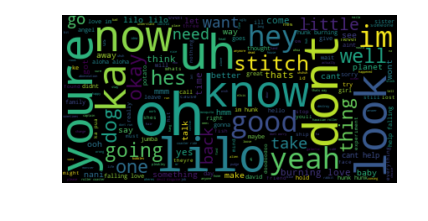

In [29]:
# creating a word cloud that shows the most popular words in Lilo & Stitch
lilowordcloud = WordCloud(max_font_size=70).generate(lilo)
plt.figure()
plt.imshow(lilowordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Let's look at the number of tokens for each part of the movie. We can guess that segments of the movie with less tokens may have a more polarized sentiment because words will have a stronger impact.

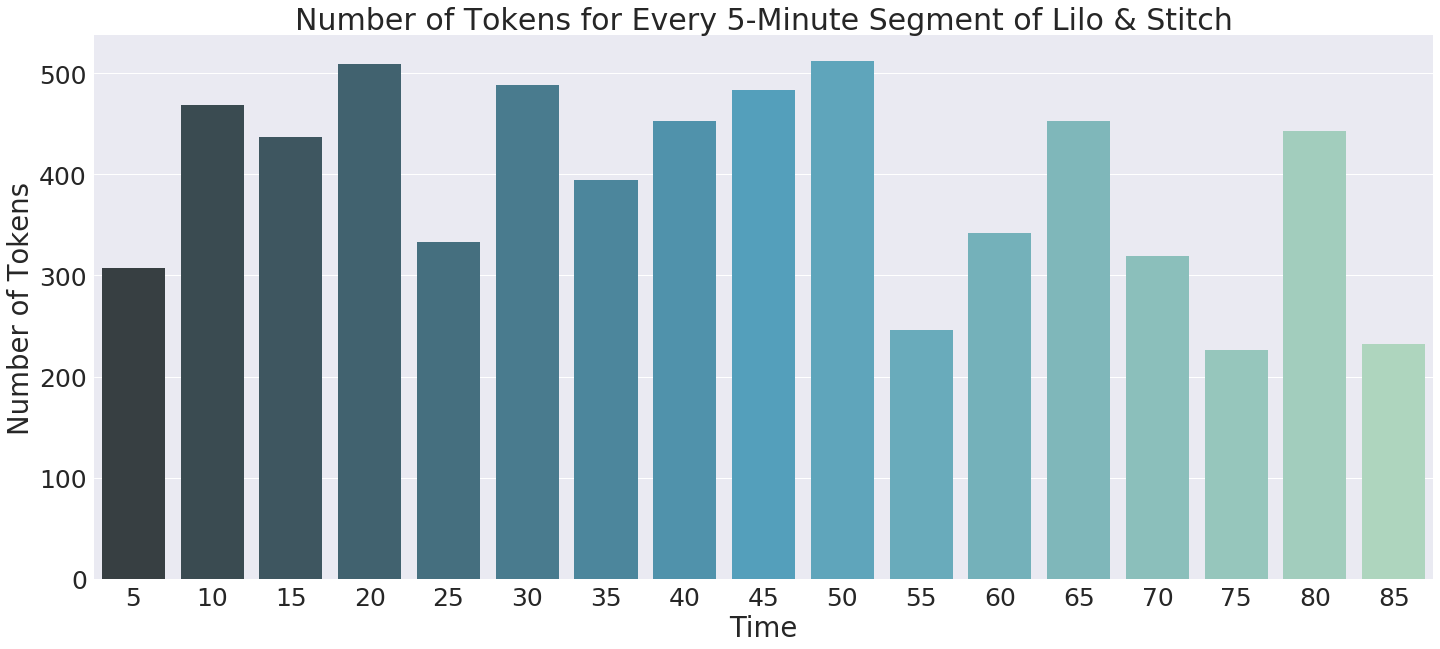

In [30]:
# creating a plot that shows the number of tokens for each time block as the movie progresses
fig = plt.figure(figsize = (24, 10))
ax = sns.barplot(list(df_lilo.index), list(df_lilo['Number of Tokens']), palette='GnBu_d', order=lilo_times)
ax = plt.xlabel('Time') 
ax = plt.ylabel('Number of Tokens')
ax = plt.title('Number of Tokens for Every 5-Minute Segment of Lilo & Stitch')

Let's plot the sentiment values calculated earlier so that we can see how the sentiment varies as the movie progresses. We can also compare the sentiment of the time periods to the overall sentiment of the movie.

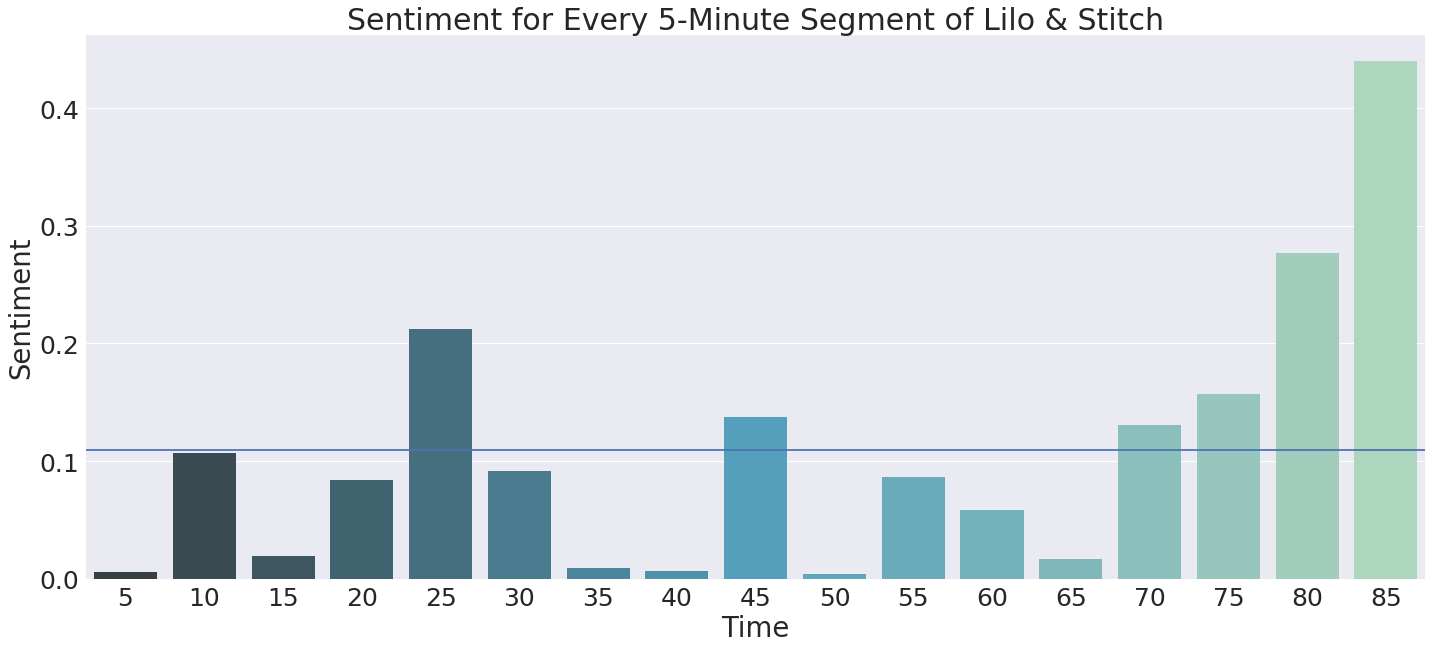

In [31]:
# creating a plot that shows the sentiment for each time period as the movie progresses
fig = plt.figure(figsize = (24, 10))
ax = sns.barplot(list(df_lilo.index), list(df_lilo['Sentiment']), palette='GnBu_d', order=lilo_times)
ax = plt.xlabel('Time')
ax = plt.ylabel('Sentiment')
ax = plt.title('Sentiment for Every 5-Minute Segment of Lilo & Stitch')
ax = plt.axhline(y=lilo_entire_sentiment) # plotting the overall sentiment

## Lilo: Analyzing the Sentiment 
We can see that the movie has a generally positive sentiment. However, we see that there is are some parts of the movie that have a significantly lower sentiment than other parts of the movie. In the first 5 minutes, the sentiment is only 0.005, and in the time 50 block the sentiment is even smaller at 0.004.  minute block, from 60-65 minutes, Stitch and Jumba are fighting, Lilo calls Mr. Bubbles and explains that aliens are attacking her house, and Mr. Bubbles comes to take Lilo away from Nani. It makes sense that some of these words and sentences would cause that part of the movie to have negative sentiment. Let's look at what happened:

**Time Block 05: The first 5 minutes**
At the beginning of the movie, Jumba is sentenced to exile for illegal genetic experimentation. Words such as "monstrosity", "unethical", "gunfire", and "destroy" appear in this part of the movie, so it makes sence that the sentiment would be close to 0. However, the sentiment is still slightly positive which is interesting.
<img src="5-both.png" style="width: 900px;" style="float:right"/>

**Time Block 40: Stitch**
During this period from 35-40 minutes in the movie, Lilo takes Stitch home from the shelter. Nani is off-put by Stitch and sees him as some kind of monster because he was programmed to be destructive.
<img src="40-both.png" style="width: 900px;" style="float:right"/>

**Time 45: A time of positivity**
Time block 45 has a pretty large sentiment compared with the time block right before and the time block after. Looking back at the movie, this is the part where Lilo teaches Stitch how to be a model citizen, so there is lots of positive language as well as an Elvis song.
<img src="45.JPG" style="width: 400px;" style="float:right"/>

**Time 50: A somehwat happy scene with very low sentiment**
This scene is pretty happy overall, with Lilo, Stitch, Nani, and David surfing to get over their bad days. One reason that the sentiment may have been low was because Jumba and Pleakley were trying to steal Stitch back, but another underlying reason could be that the words in Hawaiian triggered a lower sentiment than normal English words.
<img src="50-both.png" style="width: 900px;" style="float:right"/>

**Time Block 65: "Aliens are attacking my house"**
One interesting thing about this analysis is that there is a scene in which Jumba and Pleakley go to Lilo's house to try to capture Stitch, and Lilo is caught in the middle of the fight. However, this period of the movie did not have as negative a sentiment as other parts of the movie. 
<img src="95-both.png" style="width: 900px;" style="float:right"/>

During the last 5 minutes of the movie, the credits are playing and the only words in the transcript are the lyrics to Elvis's Burning Love. It is likely that the sentiment for this part of the movie is so high since it is a song about love, and the word love is repeated many times during the song.

[All image rights to Disney. Screenshots taken from Lilo & Stitch (2002) streamed on Hulu.]

# Moana: The Data
The script of the 2016 Disney animated film *Moana* was taken from 
[this website](//https://www.springfieldspringfield.co.uk/movie_script.php?movie=moana). I manually corrected some spelling mistakes that I noticed, as well as added song lyrics and other dialogue where it was missing.

In order to look at the sentiment of the script as the movie progresses, I had to watch the movie and manually split the text into 5 minute blocks. In addition, I noticed that the script for the portion of the movie from 15 minutes to 20 minutes, `m20`, did not include the lyrics of the song that was sung during that part of the movie. In order to account for those missing words, I added in the text manually. This is to keep it consistent with other parts of the movie where songs are sung and the lyrics to the song are included in the script that I used.

In addition, the script did not include songs sung during the credits, or the words of the post-credits scene, so I added those in as well. I have added notes where I appended to the original script that I was using. I added in the song during the credits because the text for Lilo & Stitch had a song during the credits that was included in the script, so I did this to keep things consistent.

The naming system used for the time blocks follows the same pattern as the naming system used for Lilo & Stitch, where time 5 corresponds to the first 5 minutes, time 10 corresponds to time 5-10, and so on. `m5` is the text in the first 5 minutes of the movie, and `m10` is the text in the 5 minutes from 5-10 minutes in the movie.

In [32]:
# loading in the script of Moana
with open('moana.txt', 'r') as f:
    moana_full_text = f.read()

In [33]:
# processing the script to remove punctuation and make it all lowercase
moana = ''.join([word for word in moana_full_text if word not in punctuation])
moana = moana.lower()

In [34]:
m5 = 'in the beginning\nthere was only ocean\nuntil mother island emerged\nte fiti\nher heart has greatest\npower ever known\nit could create life itself\nand te fiti share it with the world\nbut in time some begin to seek\nte fitis heart\nthey believe the faith could possessed\nthe great power of\ncreation would be vast\nand one day\nthe most daring of them all\nvoyage across the vast\nocean to take it\nhe was a demigod of wind and sea\nhe was a warrior \na trickster\na shape shifter who could change form\nwith the power of his magical fish hook\nand his name was maui\nbut without her heart\nte fiti began to crumble\ngiving birth to a terrible darkness\nmaui fright escape\nbut was confronted by another\nwho saw the heart\nte ka a demon of earth and fire\nmaui was struck from a sky\nnever to be seen again\nand his magical fish hook \nand the heart of te fiti were lost to the sea\nwhere even know 1000 years later\nte ka and the demon of the deep\nstill hunt for the heart\nhiding in the darkness that\nwill continue to spread\nchasing away our fish\ndraining the life from island after island\nuntil everyone of us\nis the bowed by the blood thirsted joys\nof inescaped of our dead\nbut one day\nthe heart will be found\nby someone who would\njourney beyond the reef\nfind maui\ndelivered him across\nthe great ocean\nto restore te fitis heart\nand save us all\nthank you mother thats enough\npapa\nno one goes outside the reef\nwere safe here\nthere is no darkness\nthere are no monsters\n master  master master\n theres no monster no monster\n darkness\n hey ahh\nbut there is nothing beyond\nthat reef but storm\n and rough sea\n i get the bowed\nas long as we stay on our very safe island\nwell be fine\nthe legend are true\nsomeone would have to go\nmother\nmotului is paradise\nwho would want to go in anywhere else'

In [35]:
m10 = 'moana\noh there you are\nmoana what are you doing\nyou scared me\nfun i wants go back\ni know i know\nbut you dont go out there\nits dangerous\nmoana come on\nlets go back to the village\nyou are the next great\nchief of our people\nand you do wonderous\nthing my little minou\noh yes but first\nyou must learn where your meant to be\nmoana\nmake way  make way\nmoana its time you knew\nthe village of motunui is all you need\nthe dancers are practising\nthey dance to an ancient song\nwe need a new song\nthats what we need\nthis tradition is our mission\nand moana theres so much to do\ndont trip on the taro root\nthats all you need\nwe share everything we make\nwe joke and we weave our baskets\nthe fishermen come back from the sea\n i wanna see\n dont walk away\nmoana stay on the ground now\nour people will need a\nchief and there you there\nthere comes a day\nwhen youre gonna look around\nand realize happiness\nis where you are\nconsider the coconut\nconsider its tree\nwe use each parts of the coconut\nthats all we need\nwe make our nets from the fibers\nthe water is sweet inside\nwe use the leaves\nto build fires\nwe cook up the meat inside\nconsider the coconuts\nthe trunks and the leaves\nthe island gives us what we need\n and noone leaves\n thats right we stay\nwere safe and were well provided\nand when we look to the future\nthere you are\nyoull be okay\nin time youll learn just as i did\nyou must find happiness right\nwhere you are\ni like to dance with the water\nthe undertow and the waves\nthe water is mischievous ha \ni like how it misbehaves\nthe village may think im crazy\nor say that i drift too far\nbut once you know what you like\nwell there you are\nyou are your fathers daughter\nstubbornness and pride\nmind what he says but remember'

In [36]:
m15 = 'you may hear a voice inside\nand if the voice starts to whisper\nto follow the farthest star\nmoana that voice inside\nis who you are\naahhh\ndad\ni was only looking at the boats\ni wasnt gonna get on them\ncome on\ntheres something i\nneed to show you\ni wonder to bring you here from\nthe moment you open your eyes\nthis is a sacred place\nthe place of chiefs\nthere would come a time\nwhen you will stand on this peaked place\na stone on this mountain\nlike i did\nlike my father did\nand his father and every chief that is ever been\nand on that day\nwe knew at your stone\nyou will raise this whole\nisland higher\nyou are the future of\nour people moana\nmay are not out there\nthere are right here\nits time to be who they need you to be\nwe make our nets from the fibers\nwe make our nets\n from the fiber \nthe water is sweet inside\nwe use the leaves\nto build fires\nwe cook up the meat inside\nthe village believe in us huh\nthats right\nthe village believe huh\nthe island gives us what we need\nand no one leaves\nso here ill stay\nmy home and my people beside me\nand when i think of tomorrow\nthere we are\ni lead the way\nill have my people to guide me\nwell build our future together\nwhere we are\ncause every path leads you back to\nwhere you are\nyou can find happiness right\nwhere you are\nwhere you are\nevery storm this roof leaks\nno matter how many font i add\nthis is not the font\n wind shifted the coast\n ohhh\nthats good work\noh amy\nno i wasnt \nwhat they calling me so i gotta \nbye\nyoure doing great\nis it done yet \nso close\nim curious about that chicken\neating the rock\ni mean she seem to like them\nbasic intelligent required\npretty much everything\nso we maybe just cook him\nsometimes our strange like beneath this\nfar beneath\nin some cases\nbut im sure this more that\nheihei than misdia\nits the harvest\nthis morning i was\nhusking the coconuts and \nwell\nwe should clear the diseased trees\nand we will start a new grow\nthere\nthanks moana\nshes doing great\nthis suits you\nchief\ntheres something you need to see\nour traps in the east lagoon\nthey pulling out less and least fish\nthen well rooted\nthe fishing ground\nwe have theres no fish\noh\nthen well fish far side of the island\nwe tried\nthe windworth side\namelieworth side\na shallow\nchianu\nwe tried the whole lagoon\nthey just  gone\nwhat you have tried using it for the bait\ni dont using it as a bait\ni would talk to the counselor\n im sure well\n what if\nwe fished beyond the reef\nno one goes beyond the reef\ni know but if there\nare no fish in the lagoon\n moana\n and theres a hope\n in the oceans\n we have one rule\nin older rule when there were fish\na rule that keep us safe\n but dad\n and stay of endangered our people\nsay you can run right back to the water\nif we time i think\nyoull pass test\nno one goes beyond the reef'

In [37]:
# the script that I copied from the website did not have the song included in the script here
# I went back and added the lyrics to the song 'How Far I'll Go' which was sung during this portion
# of the movie so that the number of tokens would stay consistent, and it might also affect the sentiment
m20 = 'well its like what you said in\nfront of your dad\nstanding on a boat\ni ddnt say go beyond the reef\nbecause i want to beyond the ocean\nbut you still do\n hes hard on you because\n because he doesnt get me\nbecause he was you\ndrawn to the ocean\nchallenged by the shore\nhe took the canoe moana\nhe crossed the reef\nand founded unforgiving sea\nwaves like mountains\nhis best friend begged\nto be on that boat\nhe couldnt save him\nhes hoping he can save you\nsometimes who we wish we were\nwhat we wished what we can do\nthis is just not meant to be\ni can do this\ntheres more fish\nbeyond the reef\ntheres more beyond the reef\nmuch so bright ive been staring at the edge of the water\nlong as i can remember never really knowing why\ni wish i could be the perfect daughter\nbut i come back to the water no matter how hard i try\nevery turn i take every trail i track\nevery path i make every road leads back\nto the place i know where i can not go where i long to be\nsee the line where the sky meets the sea it calls me\nand no one knows how far it goes\nif the wind in my sail on the sea stays behind me\none day ill know if i go theres just no telling how far ill go\ni know everybody on this island seems so happy on this island\neverything is by design\ni know everybody on this island has a role on this island\nso maybe i can roll with mine\ni can lead with pride i can make us strong\nill be satisfied if i play along\nbut the voice inside sings a different song\nwhat is wrong with me\nsee the light as it shines on the sea its blinding\nbut no one knows how deep it goes\nand it seems like its calling out to me so come find me\nand let me know whats beyond that line will i cross that line\nthe line where the sky meets the sea it calls me\nand no one knows how far it goes\nif the wind in my sail on the sea stays behind me\none day ill know how far ill go'

In [38]:
m25 = 'what ever just happened\nblame it on the pig\ngrandma\nare you gonna help dad\ni miss mom\ni dont have to tell him anything\nhe was right\nabout going out there\nits time to put my stone on the mountain\nokay\nwell then head on back\nput that stone at there\nwhy you trying to talk me all of it\nyou said thats what you wanted\nit is\nwhen i die\nim going to come back this one of these\nor i chose the wrong tattoo\nwhy youre acting weird\nim a village crazy lady\nthats my job\nis there something you\nwant to tell me\njust tell me\nis there something you\nwant to tell me\nis there something you want to hear\nyouve been told all our people stories\nbut one\nwhat is this place\ndo you really think our\nancestors stayed within the reef \nwhats in there\nthe answer\nto the question you\nkeep asking yourself\nwho are you meant to be\ngo inside\nbang the drum\nand find out\nbang the drum\ntatou o tagata folau valaauina\ne le atua o le sami tele e o mai\nla avae le luitau e lelei\ntapenapena\nolo olo  baka\naue aue\nnuku i mua\nte manulele e tataki iei\naue aue\nte fenua te malie\nnae ko hakilia kainga e\nwe read the wind and sky\nwhen the sun is high'

In [39]:
m30 = 'we sail the length of the seas on\nthe ocean breeze\nat night we name every star\nwe know where we are\nwe know who we are\nwho we are\naue aue\nwe set a course to find\na brand new island everywhere we roam\naue aue\nwe keep our island in our mind\nand when its time to find home\nwe know the way\naue aue\nwe are explorers\nreading every sign\nwe tell the stories of our elders\nin a never ending chain\nte fenua te malie\nnae ko hakilia\nwe know the way\nwe were voyagers\nwe were voyagers\nwe were voyagers\nwe were voyagers\nwe were voyagers\nwhy we stop\nmaui\nwhen he stole from the mother island\ndarkness fell\nte ka awoke\nmonster looked and boat stop coming back\nto protect our people\nthe ancient chiefs\nforbid voyaging\nand now we have forgotten\nwho we are\nand the darkness has continue to spread\nchasing away our fish\ndraining the life\nfrom island after island\nour island \nbut one day\nsomeone will journey beyond that reef\nfind maui\ndeliver him across the great ocean\nto restore the heart of te fiti\ni was there that day\nthe ocean chose you\ni thought it was a dream\nnope\nour ancestors believed maui lies there\nat the bottom of his hook\nfollow it and you will find him\nbut \nwhy itll choose me \ni dont even know how\nto make it pass the reef\nbut i know who does\nthe clouds are turning black\nwhat about the fish\n it happens all over the island\n please please\n settle down\n what are you going to do \nwho will dig new field \n well find a way\n we \n can stop the darkness\nsave our island\nthis cave have a boat\nhuge canoes\nwe can take them to find maui\nmake him restore\nthe heart\nwe were voyagers\nwe can voyage again\nyou told me that how our people\nthis is how we help our people\ndad\nwhat are you doing \ni shouldve burned those boat a long time ago\nno \ndont \nwe have to find maui\nwe have to restore the heart\nthere is no heart\nthisthis is just a rock\nno \nchief\nits your mother\nmother\nwhat can be done\ngo\ngrandma\ngo\nnot now\ni cant\nyou must\nthe ocean chose you\n follow the fish hook\n grandma\nand when you find maui\nyou grab him right here\nyou say\ni am moana'

In [40]:
m35 = 'of motunui\nyou will board my boat\nsail across the sea\nand restore the heart of te fiti\ni i cant leave you\nthere is no way you could go\nthat i wont be with you\ngo\ntheres a line with sky meet the sea\nand he calls me\nbut no one knows\nhow far it goes\non the time wondering well\ni need to be is behind me\nonce i know\nevery turn i take\nevery trail i track\nits a choise i make\nno i cant turn back\nto the great unknown\ni go alone\nwhere i long to be\nsee her light with the night\nin the sea she calls me\nyes i know\ni can go\ntheres a moon in the sky and the\nwind is behind me\nso not know\nhow far i go\ni am moana motului\nyou were board my boat\nsail across the sea\nand restore the heart of te fiti\ni am moana\nof motu lui\nheihei\nits okay\nyoure alright\nyes see\nthere we go\nnice water\nan ocean is a friend of mine\nheihei\nheihei\nstay\nok\nnext stop\nmaui\ni am moana of motului\nyoure board my boat\nsail across the sea\nand restore the heart of te fiti\ni am moana of  motu\nmoana boat\noh no\nno  no nono\nno\nocean\ni can ask little help\nno no\nplease\ncome on'

In [41]:
m40 = 'help me\nplease\nehmm\nwhat\ni said help me\nand wracking my boat\nnot help me\nfish peeing you  all day\nso \nmaui\nmaui\nmaui demigod\nbring him see i am\nmoana of motului\nyou were board my boat\nno\nyou will board my boat\nyeah\nhi im moana of motului\n you will board my \n boat\na boat\nthe god has given me a boat \nmaui\nshape shifter\ndemigod of the wind and sea\n i am moana\n hero of man\nwhwhat \nits actually maui the shape shifter\ndemigod of wind and sea\nhero of man\ninterupted from the top\nhero of man\ngo\n i am mo \n sorry sorry sorry sorry\nand women\nman and women both all\nmothers of gargoyle thing\nah you know maui\nis a hero to all\nyouve doing great\nwhat\n no i came here to \n of course of course\nyes yes yes yes\nmaui always has time\nfor his fans\nand use a bird to write with\nits called tweety\ni know not every day you got a\nchance to meet your hero\nyou are not my hero\nand im not here so you\ncan sign my oar\nim here because you stole the heart of te fiti\nand you will board my boat\nsail across the sea and put it back\nyeah\nit almost sounds like you\ndont like me\nwhich is impossible\nbecause i got stuck here\nfor a thousand years\ntrying to get the heart\nas a gift for you mortal\nso you have the power\nto create life itself\nyes so i believe\nyou are trying to say\n is thank you\n thank you \n youre welcome\n but no no no\ni  i didnt \ni wasnt \n why were i ever seen you and you\n okay okay okay\ni see whats happening  yeah\nyoure face to face with\ngreatness and its strange\nyou dont even know\nhow you feel\nits adorable \nwell its nice to see that humans\nnever change\nopen your eyes lets begin\nyes its really me its maui\nbreathe it in\ni know its a lot the hair the bod \nwhen youre staring at a demigod\nwhat can i say \nexcept youre welcome\nto the tide the sun the sky\nhey its okay it is okay\nyoure welcome\nim just an ordinary demiguy hey\nhey what has two thumbs\nand pulled up the sky\nwhen you were waddling ye high\nthis guy \nwhen the nights got cold\nwho stole you fire from down below \nyoure looking at him yo \noohh also i lasso the sun\nyoure welcome\nto stretch your day and bring you fun\nalso i harnessed the breeze\nyoure welcome to fill your sails\nand shake your trees\nso what can i say except\nyoure welcome\nfor the island i pulled from the ocean\ntheres no need to pray its okay\nyoure welcome\ni guess its just my way of being me\nyoure welcome\nyoure welcome\nwell come to think of it'

In [42]:
m45 = 'kid honestly i can go on and on\ni can explain every natural phenomenon\nthe tide the grass the ground\noh that was maui just messing around\ni killed an eel i\nburied its guts\nsprouted a tree now youve got coconuts\nwhats the lesson \nwhat is the takeaway\ndont mess with maui when hes\non the breakaway\nand the tapestry here in my skin\nis a map of the victories i win\nlook where ive been i\nmake everything happen\nlook at that mean mini maui just\ntippity tappin\nwell anyway let me say\nyoure welcome\nfor the wonderful world you know\nhey its okay its okay\nyoure welcome\nwell come to think of\nit i gotta go\nhey its your day to say\nyoure welcome\ncause im gonna need that boat\nim sailing away away\nyoure welcome\ncause maui can do\nanything but float\nyoure welcome\nyoure welcome\nand thank you \nhey let me out \n youre lying slummy son of the \n mm  mmm\nyoure welcome\nno\nim not going to te fiti\nwith some kid\nim gonna get my hook\nyou have yours and im not maui\nwithout mine\nokay talk to the back\nboat snack\noh no no no\ndont look at me like that\nits a beautiful cave shes gonna love it\nim going to love you\nin my belly\nno was that new drumstick\ni can watch that all day\nokay enjoy the island\n maui auww\n no\nstop \nhey youre pull back the horde\ndid not see that coming\ni am moana of motului\nthis is my canoe\nand you will journey to aahh\nalright get over it\nwe gotta move\nand shes back\ni am moana of motuluiiii\n it was moana right\n yes\nand you will restore the heart\nalright im out\nahh come on\nwhat is your problem\n are you afraid of it \n no\nno hahaha\nim not afraid\nstay out of it or you\nsleeping in my armpits\nyou stop it\nthat is not a heart\nit is a cursed the second i took it\ni got blasted out of the sky\nand i lost my hook\nget it away from me\nget this away\nhah  hey  hey im demigod okay\nstop that\ni will smack you\nyou wannna get smote\nlisten that thing doent give you\npower to create life\nits a homing weaken of death\nif you dont put it away bad thing will\ncome for it\ncome for this  the heart\nyou mean this heart right here\ncome and get it\nyou are gonna get us killed\nno im gonna get us to te fiti\nso you can put it back\nthank you\nyoure welcome\nkakamora\nkaka what\nmurdering little pirates'

In [43]:
m50 = 'wonder what theyre here for \ntheyre kind of cute\nocean do something help us\nthe ocean doesnt help you\nyou help yourself\nyou cant sail \ni  i am soft touch\ncant you shift shape\nor something\nyou see my hook\nno magic hook\nno magic powers\nthe boat  is turning into my fault\nyup\ni just did best\nno no no no\nheihei\nmaui they took the heart\nthat a chicken\nthe heart is in the \nwe have to get it back\nmauiii\nthere right there\nyoure turning\nwhat are you doing\nescaping\n the heart\n forget it youre never get it back\nbeside we got a better one\nhey\nwhat do i gonna steal with\nthey just gonna kill you\ncoconuts\nhah got it\noo oohh\nhey\nyeah\nwe did it \ncongratulations on a being dead curly\nyou surprise me\nbut i still not taking that thing back\nyou wanna get to te fiti\nyou have to go through\nthe whole oceans and bad\nnot to mention te ka\nlava monster\never defeat lava monster\nno\nhave you\nim not going on a\nsuicide mission with some mortal\nyou can restore the heart\nwithout me\nand me says  no\nim getting my hook\nend of discussion'

In [44]:
m55 = 'youll to be a hero\nthats what you are about rights \nlittle girl i am a hero\nmaybe you were but now \nnow youre just the guy who\nstole the heart of te fiti\nthe guy who cursed the world\ndont know one fellow\nno one\nbut put this back\nsave the world\nyoud be everyones hero\nmaui maui maui\nguess whats they say\nwe never make it without my hook\nnot pass te ka\nthen we get your hook\nwe get you hook take out te ka\nrestore the heart\nunless you dont wanna be\nmaui demigod of wind and\nsea hero to all\nfirst we get my hook\nthen save the world\ndeal \ndeal\nwhat the shot \nokay we go east\nto the lea of tomatoa\nif anyone has my hook\nits that be the high bottomfield\nteach me to sail\nmy job is to deliver\nmaui across the great ocean\ni should\ni should be sailing\nits call wave finding princess\nits not just sail and not\nits sea where youre going in your mind\nknowing where you are\nby knowing where youve been\nokay first \nim not a princess\nim the daughter of the chief\n same difference\n no\nif you weary dress and you have\nanimal sidekick\nyoure princess\nyoure not away find her\nyoure never be away find her\nyoure never be a way\nreally\nblow dart and my butt ache\nyou are a bad person\nif you can talk you can teach\nway finding\nlesson one  hit it\npull the sheets\nnot the sheets\nno\nno\nno\nno\ntry that one already\nyoure measuring the stars\nnot giving the sky hi five\nif the current warm\nyoure going the right way\nits cold\nwait its getting warmer\nthen its disgusting\nwhats wrong with you\nb lack c loud\nwere here\nsee i told you i can do it\nmotului\nim home\nmoana\ndad\nmoana\nmom \nhelp \nno\nmoana\nenjoy your beauty rest\nyou know a real wave finder never sleeps\nso they actually get what they need to go\nmuscle up butter cup\nwere here\nyou sure this guys gonna have your hook\ntamatoa oh yeah have it\nhes a skyvenger\ncollect stuff things that looks cool\nand for tomatoa\ntrust me my hook\nis the coolest collected\nand he lives up there\nohho no no no\nthats just the entrance\nto a lalotai\nlalotai \nrealm of monsters\nwe going to the realms of monsters\nwe \nno\nme\nyou are gonna stay here\nwith the other'

In [45]:
m60 = 'chicken\nthats what im talking about\ngive me some \ncome on that was a good one\nhow youd not get it\ni called her chicken that\nchicken on the boat\ni know shes human but thats not\nyou know forget it\nforget it im not explaining it to you\nwhat  cause that is not funny\nso\ndaughter of the chief\ni thought you stayed in the village\nyou know kissing babies and things\nhey im just trying to understand\nwhy your people decided to send her\nhows my phrases \nyou\nmy people\ndidnt send me\nthe ocean did\nthe ocean makes sense\nyoure what  ape\ncant sail\nobvious choice\nit chose me\nfor a reason\nif the ocean so smart\nwhy didnt just take the heart\nback to te fiti itself\nor bring me my hook\nthe ocean straight up pooky dooks\nbut im sure its not wrong about you\nyoure the chosen one\nthe ocean chose you for a reason\nif you start singing im wanna throw up\nso not seeing entrance\nyes because it only\nappear after a human sacrifice\nkidding hahaha\nso serious\ndo not worry its a lot far\ndown there than it looks\ni am still maui\ngo\nand hes sticks the landing\nwhat\ndumbdumb shes not even here\nno mortals gonna jump\ninto the realm of mon\nwell\nshes dead\nokay lets get my hook\nmauis fishhook\nyeah\nsorry\ni thought youre a monster but\ni find your hook and youre right\n this tomatoa really like the treasure\n stay\nwhat \nno \n im im the one who\n listen\nfor a thousand years\nive only been thinking of keeping this \ngetting my hook and being awesome again\nand its not getting screwed up\nby a mortal\nwho have no business\ninside of monsters cave except \nexcept \nmaybe its bait\nhah\nwow the shiny glitterin cave\nand just like me\nit is covered in sparkly treasure\nsparkle  sparkle\n sparkle\n youre not sell of it\nthis is stupid im just\nwalk that gate\nyou go out there'

In [46]:
m65 = 'he would kill you\njust stick to the plan\noh when he shows up\nkeep him distracted\nmake him talk about himself\nhe loves braking about\nour gravious\nmaui\nwhat have we here \nits a sparkly shiny\nwait a minute\nits a human\nwhat are you doing down here\nin the realms of the mons \njust blinking eyes babe\ni cant  i cant\nconcentrate on what i saying\nif you keep \nyep pick one pick one\nyou are funny looking little thing arent you \ndont its my grandmas\nthats my grandma\ni ate my grandma\ndan it took a week cause\nshe was absolutely humongous\nwhy are you here \ncause youre amazing\nand we mortals have heard\nthe tales about the crab\nwho became a legend\nand i got to know\nhow you being so \ncrap\nyou less \nare you just trying to get me to\ntalk about myself\nbecause if you are \ni will gladly do so\nin song form\nwell tamatoa hasnt always been this glam\ni was a drab little crab once\nnow i know i can be\nhappy as a clamp\nbecause im beautiful baby\ndid your granny say listen to your heart\nbe who you are on the inside\ni need three words to tear her\nargument a part\nyour granny lied\nid rather be shiny like a treasure\nfrom a sunken pirate wreck\nscrub the deck and make it look shiny\ni will sparkle like a wealthy womans neck\njust a sec dont you know \nfish are dumb dumb dumb\nthey chase anything that glitters\nbeginners oh and here they\ncome come come\nto the brightest thing that glitters\nmmm fish dinners\ni just love free food\nand you look like seafood\n no \n hey  crab cakes\nim back\nits maui time\nwhat do you say little buddy\ngiant hook\ncoming up\nwell well well\nlittle mauis having trouble with his look\nyou little semidemiminigod\nouch  what a terrible performance\nget the hook   get it  \nyou dont swing it like you used to man\nyet i have to give you credit for my start\nand your tattoos on the outside\nfor just like you i made myself a work of art\ni never hide i cant\nim too shiny\nwatch me dazzle like a diamond in the rough\nstrut my stuff my stuff is so shiny\nsend your armies but theyll never be enough\nmy shells too tough maui man\nyou could try try try\nbut you cant expect a demigod\nto beat a decapod\nlook it up\nyou will die die die\nnow its time for me to take apart\nyour aching heart\nfar from the ones who abandoned you\nchasing the love of these humans\nwho made you feel wanted\nyou try to be tough\nbut your armours just not hard enough\nmaui  now its time to kick your hiney\never seen someone so shiny\nsoak it in cause its the last youll ever see\ncest la vie mon ami im so shiny\nnow ill eat you so prepare your final plea\njust for me\nyoull never be quite as shiny\nyou wish you were nice and shiny\nhey\ni got something shiny for you\nthe heart of te fiti\nyou can run from me\noh you cant\nyou keep surprising me\nits only so far you can get on\nthese two little legs'

In [47]:
m70 = 'the power of creation\nfor the crustaceans\nwhere is it \nwhere is it \nwe gotta go\nwell what about the heart\nhe can have it\nive got a better one\nyes i have the \nwait a minute\ni see shes taking banakaru\nand shes covered with\nbio luminescent algae\nhas it devision \ncome back here\nhey \nhey \ndid you like the song\nwere alive\nwere alive\nlisten\n i appreciate what you did down there\n mmhmm\ntook guts\nbut im sorry\nim tryin to be sincere for once\nand it feels youre distracted\n no no no way\n really\ncause you looking at\nme like i have a \nshark head\n do you have a shark head cause i \n look \nthe point is \nfor little girl child thing wharever\nwho had no business being down there\nyou did me a solid\nbut you also almost died\nand i couldnt even beat\nthe dumb crab\nso chances of beating te ka\nbup kiss\nwere never making it to the te fiti\nthis mission is curse\nits not cursed\n shark head\n its not cursed\ncursed\nwhat can i say except\nwere dead soon\nwere dead soon\ncant you at least try\ngiant hook\nhey its okay its okay\nwere dead soon\nalright play time is over\nget up\nwhy\nyoure gonna give me a speech\ntell me i could beat te ka cause im \nmaui\ntake a hike tiny\nhow do you get your tatoos\nthey show up when i earn them\nhow do you earn that one\nwhats that for \nthats a mans discovery of nanya\nwhats nanya \nnon yall business\ni just keep asking\nwhats that for \nyou need to stop doing that\n back off\n just tell me what it is \ni said back off\nis that why your hook not working\nyou dont wanna talked\ndont talk\nyou wanna throw me off the boat\nthrow me off\nyou wanna tell me i dont\nknow what im doing\ni know i dont\ni have no idea why\nthe ocean chose me\nyoure right\nbut my island is dying\nso i am here\nits just me and you\nand i want to help\nbut i cant if you dont let me\ni wasnt born a demigod\ni have human parents\nthey\nthey took one look\nand decided they\ndid not want me\nthey threw me under the sea\nlike i was nothing\nsomehow i was found by the gods\nthey gave me the hook\nthey made me maui\nand back to the human i went\ni gave them island fire coconuts\nanything they ever want\nyou took the hard for them\nyou did everything for them\nso they loved you'

In [48]:
m75 = 'it was never enough\nmaybe the gods found\nyou for a reason\nmaybe the oceans brought you to them\nbecause it saw someone who\nworthty of being saved\nbut the gods are the ones who make you maui\nyou are\nokay okay\ni i love you too buddy\nyeah\nnext stop te fiti\nwhat \ni figured it out\nyou know the ocean used to loved\nwhen i pull out violence\ncause your ancestors would sail the seas\nfind them\nall those new island new villages\nit was the water that connected them all\nand byway the ocean\ni think i be looking for ehh\ncurly hair non a princess\nto start that again\nthat is little even nicest thing\nyouve ever said to me\nprobably shouldve said that for te fiti\ni did\nmoana of motului\ni believe\nyou have officially delivered maui\nacross the great sea\nmoana moana moana\nits time\ngo save the world\nmaui'

In [49]:
m80 = 'what what are you doing \nfinding you better way in\n we wont make it\n yes we will\n turn around\n no\n moana stop\n no\nare you okay \nmaui\ni told you to turn back\ni thought we can make it\nwe\ni thought i can make it\nwe can fix it\nit was made by the gods\nyou cant fix it\nnext time will be more careful\nte ka was suck on the barely island\nits lava\nit cant go on the water\nwe can find a way around\nim not going back\nwhat we still have to restore the heart\nmy hook is cracked\none more hit and its over\nmaui you have to restore the heart\nwithout my hook i am nothing\nthats not true\nwithout my hook i am nothing\nwe are only here because you\nstole the heart in the first place\nno were here because\nthe ocean told you\nyoure special and\nyou believe it\ni am moana of motului\n you were board my boat\n goodbye moana\nsail across the sea\nim not killing myself\nso you can prove youre something\n youre not\n i just restore the heart of te fiti\nthe ocean chose me\nthe choce wrong\nmaui\nwhy did you bring me here \nim not the right person\nyou have to choose someone else\nchoose someone else\nplease\nyou are a long ways past the reef\ngrandma\nguess i chose the right tattoo\ngrandma \nthats right grandma\ni \nill crying to it\nits not your fault\ni never should have put so much\non your shoulders\nif youre ready to go home\ni will be with you\nwhy do you hesitate \ni dont know\ni know a girl from an island'

In [50]:
m85 = 'she stands apart from the crowd\nshe loves the sea and her people\nshe makes her whole family proud\nsometimes the world seems against you\nthe journey may leave a scar\nbut scars can\nheal and reveal\njust where you are\nthe people you love will change you\nthe things you have learned will guide you\nand nothing on earth\ncan silence\nthe quiet voice still inside you\nand when that voice starts to whisper\nmoana youve come so far\nmoana listen\ndo you know who you are \nwho am i \ni am a girl who loves my island\nim a girl who loves the sea\nit calls me\ni am the daughter of the village chief\nwe are descended from voyagers\nwho found their way across the world\nthey call me \nive delivered us to where we are\ni have journeyed farther\ni am everything ive learned and more\nstill it calls me\nand the call isnt out there at all\nits inside me\nits like the tide always\nfalling and raising\ni will carry you here in my heart\nyou remind me\nthat come what may\ni know the way\ni am moana\ni am moana of motului\naboard my boat i will\nsail across the sea\nand restore the heart of te fiti\nthe follow us under water\nwell make it pass the barely island\nwell make it to te fiti\nnone of us you understand\nbecause you are chicken\nno\nheihei\nno no no no no\nte fiti'

In [51]:
m90 = 'maui\nyouve came back\nbut your hook\none more hit and \nte ka has gotta catch me first\nive got your back chosen one\ngo save the world\nmaui\nthank you\nyour welcome\nhey te ka \nshort cut\nmoana\nget the heart to the sparrows\nte fiti\nits gone\nte  ka \nlet her come to me\ni have crossed the horizon\nto find you\ni know your name\nmay have strong in my heart\nfrom inside you\nbut this  this not define you\nthis is not who you are\nyou know who you are\nwho you trully are'

In [52]:
m95 = 'te fiti\nthe chicken lives\nim sorry about your hook\nwell hook no hook\nim maui\nte fiti\nhow youve been \nlook what i did was \nwrong\ni have no excuse\nim sorry\nyou know it will be rude\nto physic of the goddess\nthank you\nyou kind just sure is\ndeeply apreciate\ngonna missed you drumstick\nyou can come with us you know\nmy people are going to need a \nmaster wave finder\nthey are already have one\nsee you out there maui\nsee you out there moana\nmom  dad \nmoana\ni may have gone alone\nbut always pass the reef\nit suits you\n shes back\n moana\nmoana'

In [53]:
# the actual movie ends around 96 minutes, but during the credits the theme song "How Far I'll Go"
# plays, and since the song during the credits was included in the lilo transcript,for consistency 
# I edited the text to contain the lyrics of the songs included in the credits of Moana
m100 = 'aue aue\nwe set a course to find\na brand new island everywhere we roam\naue aue\nwe keep our island in our mind\nand when its time find home\nwe know the way\nwe are explorers reading every sign\nwe tell the story\nabout our elders in a never ending chain\nte fenua te malie\nnae ko hakilia\nwe know the way\nmoana\nive been staring at the edge of the water\nlong as i can remember never really knowing why\ni wish i could be the perfect daughter\nbut i come back to the water no matter how hard i try\nevery turn i take every trail i track\nevery path i make every road leads back\nto the place i know where i can not go where i long to be\nsee the line where the sky meets the sea it calls me\nand no one knows how far it goes\nif the wind in my sail on the sea stays behind me\none day ill know if i go theres just no telling how far ill go\ni know everybody on this island seems so happy on this island\neverything is by design\ni know everybody on this island has a role on this island\nso maybe i can roll with mine\ni can lead with pride i can make us strong\nill be satisfied if i play along\nbut the voice inside sings a different song\nwhat is wrong with me\nsee the light as it shines on the sea its blinding\nbut no one knows how deep it goes\nand it seems like its calling out to me so come find me\nand let me know whats beyond that line will i cross that line\nthe line where the sky meets the sea it calls me\nand no one knows how far it goes\nif the wind in my sail on the sea stays behind me\none day ill know how far ill go'

In [54]:
# after 'How Far I'll Go' ends, the song 'You're Welcome' plays after a short instrumental interlude
# these are the lyrics of the song that plays during the time 100-105 minutes
m105 = 'ok ok i see whats happening here\nyoure face to face with greatness and its strange\nyou dont even know how you feel\nits adorable\nwell its nice to see that humans never change\nopen your eyes lets begin\nyes its really me its maui breathe it in\ni know its a lot the hair the bod\nwhen youre staring at a demigod\nwhat can i say except youre welcome\nfor the tides the sun the sky\nhey its okay its okay\nyoure welcome\nim just an ordinary demiguy\nhey\nwhat has two thumbs that pulled up the sky\nwhen you were waddling yay high\nthis guy\nwhen the nights got cold\nwho stole you fire from down below\nyoure lookin at him yo\noh also i lassoed the sun\nyoure welcome\nto stretch the days and bring you fun\nalso i harnessed the breeze\nyoure welcome\nto fill your sails and shake your trees\nso what can i say except youre welcome\nfor the islands i pulled from the sea\ntheres no need to pray its okay\nyoure welcome\nha i guess its just my way of being me\nyoure welcome\nyoure welcome\nwell come to think of it\nkid honestly i can go on and on\ni can explain every natural phenomenon\nthe tide the grass the ground oh\nthat was maui just messing around\ni killed an eel\ni buried its guts\nsprouted a tree now you got coconuts\nwhats the lesson\nwhat is the takeaway\ndont mess with maui when hes on the breakaway\nand the tapestry here on my skin\nis a map of the victories i win\nlook where ive been\ni make everything happen\nlook at that minimaui just tippitytappin\nwell anyway let me say youre welcome\nfor the wonderful world you know\nhey its okay its okay\nyoure welcome\nwell come to think of it i gotta go\nhey its your day to say youre welcome\ncause im gonna need that boat\nim sailing away away\nyoure welcome\ncause maui can do anything but float\nyoure welcome\nyoure welcome\nand thank you'

In [55]:
# this is the very final extra scene in the movie that ends at 108 minutes
# this wasn't included in the script so I just manually typed it out since it was short
# this time block, 108, only includes the text from minute 105 to 108 because the movie ends at 108 minutes
m108 = 'shiny im so shiny didnt help me though did it still upside down here just need a little push can we be real if my name was sebastian and i had a cool jamaican accent youd totally help me you would you know you would'

In [56]:
# creating a dictionary with all of the text snippets
moana_text_dict = {'5':m5, '10':m10, '15':m15, '20':m20, '25':m25,
             '30':m30, '35':m35, '40':m40, '45':m45, '50':m50,
             '55':m55, '60':m60, '65':m65, '70':m70, '75':m75,
             '80':m80, '85':m85, '90':m90, '95':m95, '100':m100,
             '105':m105, '108':m108}

In [57]:
# creating a list of the time blocks, ie the strings '5' through '108'
moana_times = list(moana_text_dict.keys())
# creating a list that has the text snippet for each time period as defined manually above
moana_texts = list(moana_text_dict.values())

In [58]:
# creating an array of the number of tokens in each 5 minute block, and the last 3 minute block
moana_numtoks = make_array()
for i in moana_times:
    moana_numtok = len(moana_text_dict[i].split())
    moana_numtoks = np.append(moana_numtoks, moana_numtok)
moana_numtoks

array([ 343.,  343.,  556.,  394.,  234.,  412.,  235.,  492.,  452.,
        206.,  422.,  339.,  561.,  446.,  157.,  287.,  252.,   98.,
        109.,  330.,  350.,   45.])

In [59]:
# creating moana_tokens, an array consisting of the tokens for each time block
moana_tokens = []
for i in moana_times:
    mtokens = moana_text_dict[i].split()
    moana_tokens.append(mtokens)

In [60]:
# using sentiment analysis learned in the first seminar workshop to create an array of the 
# sentiments for each time block in the movie
moana_sentiments = make_array()
for moana_string in moana_texts:
    moana_snippet = TextBlob(moana_string)
    moana_sentiments = np.append(moana_sentiments, moana_snippet.sentiment.polarity)
print(moana_sentiments)

[ 0.22222222  0.1781951   0.1449625   0.05322581 -0.04542857  0.15402437
  0.13303571  0.28052288  0.28175731  0.07904762  0.08263393  0.01244856
  0.01618217  0.0293013   0.30852273  0.09301242  0.19375     0.28333333
 -0.1275     -0.02303591  0.47376877  0.04138889]


In [61]:
# adding the data from all of the arrays above into a dictionary
# creating a comprehensive dictionary that contains all of the values calculated for each time block
# The keys are the time blocks, then has values with full text in block, tokens in block, number of tokens,
# and the corresponding sentiment.
moana_dict = {}
for i in range(0, len(moana_times)):
    moana_dict[moana_times[i]] = [moana_texts[i], moana_tokens[i], moana_numtoks[i], moana_sentiments[i]]

In [62]:
# creating a dataframe that has the time block, text block, tokens, number of tokens, and sentiment for each time block
df_moana = pd.DataFrame.from_dict(moana_dict, orient='index')
df_moana.columns = ['Text in Block', 'Tokens in Block', 'Number of Tokens', 'Sentiment']
df_moana.index.name = 'Minute Block'
df_moana

,Text in Block,Tokens in Block,Number of Tokens,Sentiment
Minute Block,,,,
5,in the beginning\nthere was only ocean\nuntil ...,"[in, the, beginning, there, was, only, ocean, ...",343.0,0.222222
10,moana\noh there you are\nmoana what are you do...,"[moana, oh, there, you, are, moana, what, are,...",343.0,0.178195
15,you may hear a voice inside\nand if the voice ...,"[you, may, hear, a, voice, inside, and, if, th...",556.0,0.144962
20,well its like what you said in\nfront of your ...,"[well, its, like, what, you, said, in, front, ...",394.0,0.053226
25,what ever just happened\nblame it on the pig\n...,"[what, ever, just, happened, blame, it, on, th...",234.0,-0.045429
30,we sail the length of the seas on\nthe ocean b...,"[we, sail, the, length, of, the, seas, on, the...",412.0,0.154024
35,of motunui\nyou will board my boat\nsail acros...,"[of, motunui, you, will, board, my, boat, sail...",235.0,0.133036
40,help me\nplease\nehmm\nwhat\ni said help me\na...,"[help, me, please, ehmm, what, i, said, help, ...",492.0,0.280523
45,kid honestly i can go on and on\ni can explain...,"[kid, honestly, i, can, go, on, and, on, i, ca...",452.0,0.281757


Below I calculate the sentiment of the entire movie. This will be useful in comparing the sentiment of the individual time periods to the sentiment of the whole movie.

When computing the sentiment for the entire movie, we can see that it is positive but close to neutral. As a rated G movie, it is expected that the sentiment of Moana is positive since it is made for children and families. However, we see that Moana's overall sentiment of 0.136 is greater than Lilo & Stitch's overall sentiment of 0.109.

In [63]:
moana_entire_sentiment = TextBlob(moana).sentiment.polarity
moana_entire_sentiment

0.13571498157792564

# Visualizing the Data

Let's see the most popular words in the movie. With the word cloud created below we can see that the most popular words are the names of the two main characters, Moana and Maui. The word 'know' is also rather large, and that may be attributed to it being one of the words in the theme song "How Far I'll Go".

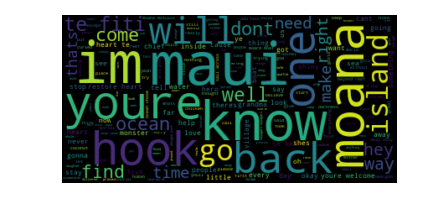

In [64]:
# creating a word cloud
moanawordcloud = WordCloud(max_font_size=70).generate(moana)
plt.figure()
plt.imshow(moanawordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Below is a plot of the number of tokens for each time segment. We can see that some time blocks have a very small number of tokens, like time 90 and 95 which have around 100 tokens each. We can guess that some negative words would have a higher impact on the sentiment for those time blocks, since there aren't as many tokens as some of the other blocks.

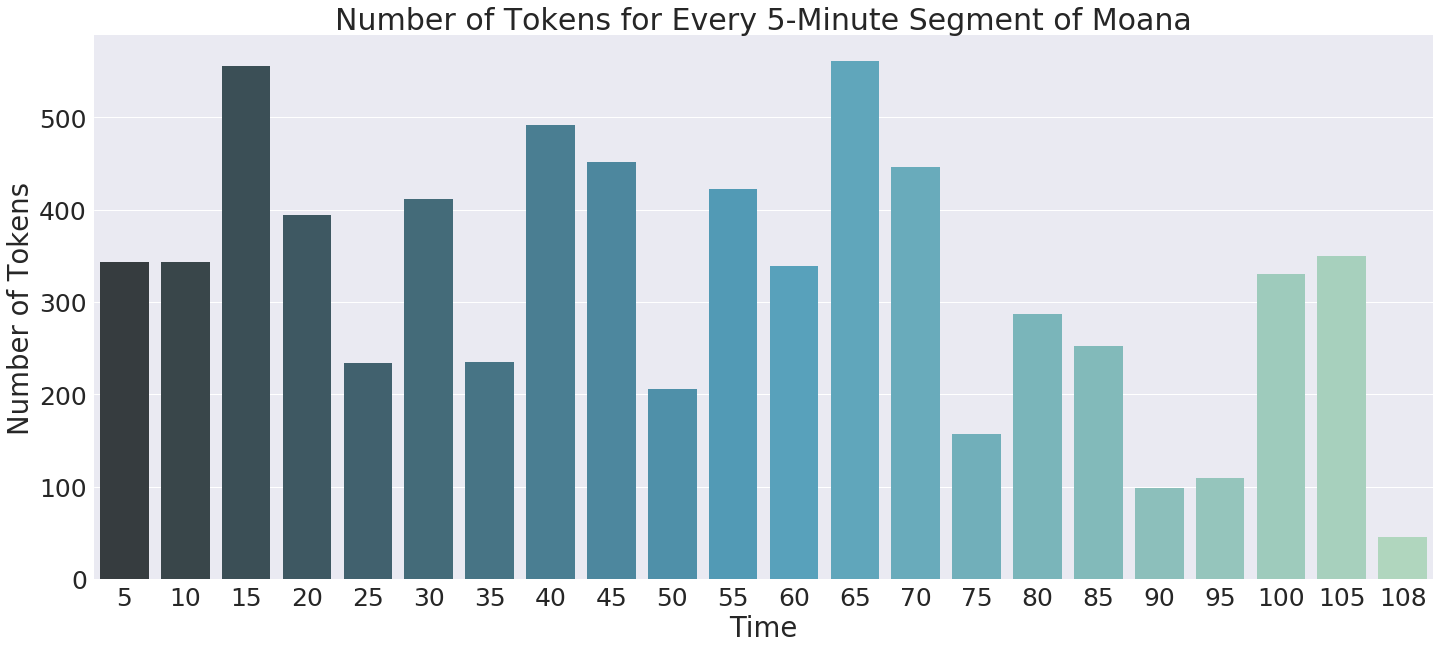

In [65]:
# creating a plot that shows the number of tokens for each time block as the movie progresses
fig = plt.figure(figsize = (24, 10))
ax = sns.barplot(list(df_moana.index), list(df_moana['Number of Tokens']), palette='GnBu_d', order=moana_times)
ax = plt.xlabel('Time') 
ax = plt.ylabel('Number of Tokens')
ax = plt.title('Number of Tokens for Every 5-Minute Segment of Moana')

Below I've created a graph that shows the sentiment for each time block during the movie. We can see which parts of the movie had negative sentiment, and which had positive sentiment. The line on the graph represents the overall sentiment of the entire movie.

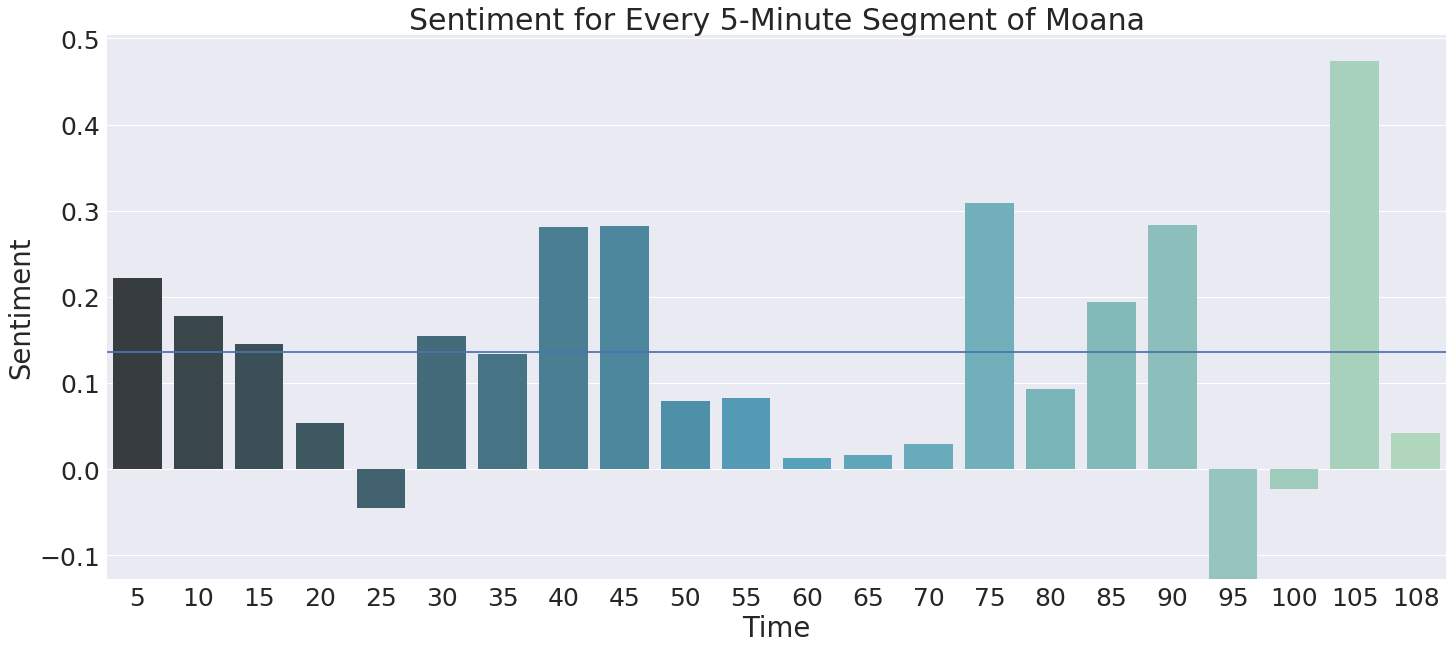

In [66]:
# creating a plot that shows the relative sentiment for each time period as the movie progresses
fig = plt.figure(figsize = (24, 10))
ax = sns.barplot(list(df_moana.index), list(df_moana['Sentiment']), palette='GnBu_d', order=moana_times)
ax = plt.xlabel('Time')
ax = plt.ylabel('Sentiment')
ax = plt.title('Sentiment for Every 5-Minute Segment of Moana')
ax = plt.axhline(y=moana_entire_sentiment)

## Moana Sentiment
Looking at the sentiment for the 5 minute blocks of Moana, we can see that the most of the movie has a positive sentiment. There are only 3 time periods where the sentiment was negative, so let's look at what was going on in the  movie during that time. I'll focus on the 2 periods where the sentiment was more negative: Time 25 and time 95.

**Time 25**
From 20-25 minutes, labeled as time 25 on the graph, the villagers are singing a song that is not in English. Since the rest of the scene did not seem particularly negative, the negative sentiment may be attributed to the fact that the lyrics are not in English.
<img src="moana25.JPG" style="width: 600px;" style="float:right"/>

**Time 95**
From 90-95 minutes, Maui apologizes to Te Fiti for stealing her heart. In addition, he talks about his hook a lot, and is granted a new magical fish hook by Te Fiti. While the sentiment of this part of the movie does not seem particularly negative, words such as "sorry", "wrong", "alone", and "gone" may have influenced the sentiment, since there are also very few tokens during time 95.
<img src="moana95.JPG" style="width: 600px;" style="float:right"/>

[Image credit to Disney. Images screenshotted from Moana, streamed on Netflix]

## Comparing Sentiments: Lilo & Stitch vs. Moana
In order to compare the sentiments and make sense of all the calculations I did, I created a graph which shows the sentiment for both Lilo and Stitch and Moana so that we can compare their sentiments for different parts of the movie.

In [67]:
# creating a dataframe that has the time and sentiment for both lilo and stitch and moana
df_both = df_moana.drop(['Text in Block', 'Tokens in Block', 'Number of Tokens'], axis=1)
df_both = df_both.rename(index=str, columns = {'Sentiment': 'Moana Sentiment'})
df_both['Lilo Sentiment'] = df_lilo['Sentiment']
df_both

,Moana Sentiment,Lilo Sentiment
Minute Block,,
5,0.222222,0.005731
10,0.178195,0.107005
15,0.144962,0.019630
20,0.053226,0.083731
25,-0.045429,0.212160
30,0.154024,0.091874
35,0.133036,0.009566
40,0.280523,0.006411
45,0.281757,0.137461


Below I've created a side by side bargraph that shows the sentiment of Lilo & Stitch and Moana for each time period. This way we can compare the sentiment for each movie based on the time in the movie. Looking at this graph, we can see that in general, it seems like the sentiments for Moana are somewhat higher on average than the sentiments for Lilo, except for at the end of Lilo & Stitch. In addition, in both movies, a song is played during the credits. It can be seen that for both movies these credit scenes have high sentiments because they have songs that have generally positive lyrics. This can be seen in time 85 when Lilo ends and time 105 just before the post-credit scene of Moana.

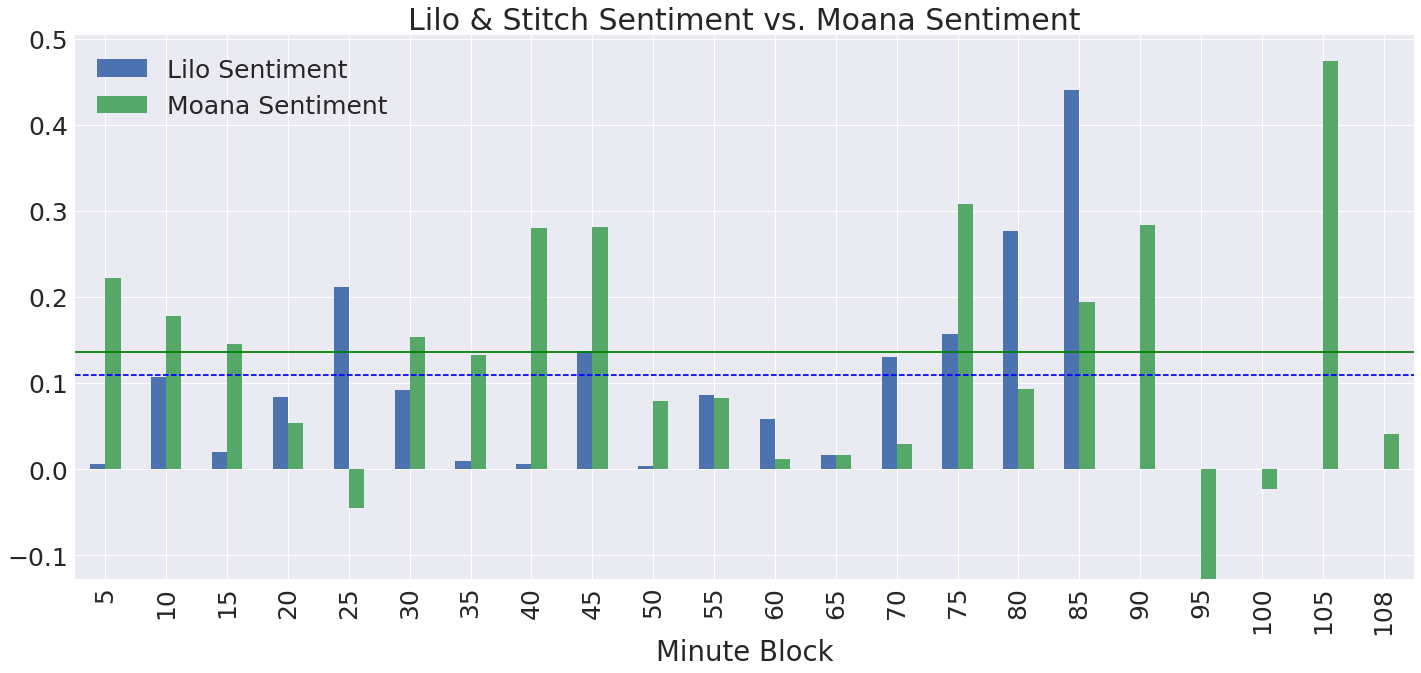

In [68]:
# creating a side by side bargraph that shows the sentiment of lilo and stitch compared to moana
ax = pd.concat([df_both['Lilo Sentiment'], 
                df_both['Moana Sentiment']],
               axis=1).plot(kind='bar', figsize = (24,10), title='Lilo & Stitch Sentiment vs. Moana Sentiment')

 # creates a blue horizontal line that shows overall lilo sentiment
ax = plt.axhline(y=lilo_entire_sentiment, color='blue',linestyle='dashed')

 # creates a green horizontal line that shows overall moana sentiment
ax = plt.axhline(y=moana_entire_sentiment, color='green')

## Conclusion
Overall, what I found was that the overall sentiment for Moana was higher than the overall sentiment for Lilo & Stitch. This supports my hypothesis that Lilo & Stitch would have lower sentiment because it involves aliens. On the graph of the sentiment of both movies, we can see that the scenes of Moana were more polarized than those of Lilo & Stitch - there were instances of negative sentiment and the positive sentiment scenes were generally more positive than the Lilo positive sentiment scenes. Both movies see a spike in sentiment at the end of the movie because during the credit scenes, both movies played songs with relatively high sentiment. Moana had a post-credit scene while Lilo & Stitch did not, which explains the much lower sentiment for time 108 of Moana. This was after the credits song had finished playing.

One other thing discovered in this project is that the sentiment analysis tools that I was using don't seem to work with other languages. For example, in Lilo & Stitch there was one relatively happy scene when Lilo, Nani, Stitch, and David are surfing, but the calculated sentiment was really low. This may have been due to the fact that the song sung during that time period was sung in Hawaiian. Similarly in Moana, for time 25 the calculated sentiment was negative although the scene showed sailors sailing across the sea. Since they were singing in a foreign language, the sentiment may not be realiable. 

Another factor in sentiment analysis is the number of tokens in the text snippet you are analyzing. For Moana, time 95 had the lowest sentiment of all of the snippets. While the scene itself is doesn't seem super negative, the fact that there are only 109 tokens and some of them are negative may have influenced the sentiment. 

Lastly, the overall sentiment for both Lilo & Stitch and Moana are slightly positive. This can be expected since both are G-rated movies for children and families.